# Model Saving test for realtime prediction

### file structure

Monlab_script

-data

--2019-08-09-17-04-36-none-R55.csv #target dataset

-MLmodels

--Moldel-Saving-test.ipynb # this file

--models # saved model will be stored in this directory

---savedmodel.h5 # saved model

In [1]:
# params
dataset = '2019-08-14-16-08-06-none-R55'
savename = "model-{}".format(dataset)
savename = 'models/{}.h5'.format(savename)
dataName = '../data/{}.csv'.format(dataset)
epoch = 10
test_size = 200
Vsplit = 0.2 # validation split
feature = 'ch2' # options: all ch1 ch2 ch1tof ch2tof
Yscope = 0.10
skip = 10 
sleepTime = 0.001 

In [2]:
# Library
import pandas as pd 
import sklearn
from sklearn import svm, preprocessing
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

print(tf.__version__)

/Users/42t43/anaconda3/envs/tensorflow14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/42t43/anaconda3/envs/tensorflow14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/42t43/anaconda3/envs/tensorflow14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/42t43/anaconda3/envs/

1.14.0


In [3]:
# loading datasets
print('Loading datasets ...')
df = pd.read_csv(dataName) # loading csv data file
print('Loaded. Start preprocessing ...')
df = df.T 
df = df.drop('Unnamed: 0', axis=0) # removing unnessesary data 
labelCint = df.shape[1]-1 # label column in int
labelColumn = '{}'.format(df.shape[1]-1) # label column in str

df = sklearn.utils.shuffle(df) # shuffling 
X = df.drop(labelCint, axis=1).values # dropping label column
# X = preprocessing.scale(X) # X is feature set (effects are doutfule)
# extructing feature
if feature == 'all':
    X = X
    inputDim = int(labelCint)
if feature == 'ch1':
    X = X[:,0:int(labelCint/3)] 
    inputDim = int(labelCint/3)
if feature == 'ch2':
    X = X[:,int(labelCint/3):int(labelCint/3)*2]
    inputDim = int(labelCint/3)
if feature == 'ch1tof':
    X = X[:,int((labelCint/3)*2):int((labelCint/3)*2.5)]
    inputDim = int((labelCint/3)/2)
if feature == 'ch2tof':
    X = X[:,int((labelCint/3)*2.5):int((labelCint/3)*3)]
    inputDim = int((labelCint/3)/2)
y = df[labelCint].values # y is label

# deviding into training and testing sets
X_train = X[:-test_size]
y_train = y[:-test_size]
X_test = X[-test_size:]
y_test = y[-test_size:]
print("Preprocess finished. X.shape is {}".format(X.shape))
print("X.shape: ", X.shape)
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y.shape: ", y.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)


Loading datasets ...
Loaded. Start preprocessing ...
Preprocess finished. X.shape is (2000, 1024)
X.shape:  (2000, 1024)
X_train.shape:  (1800, 1024)
X_test.shape:  (200, 1024)
y.shape:  (2000,)
y_train.shape:  (1800,)
y_test.shape:  (200,)


Plotting X
y[0] 1


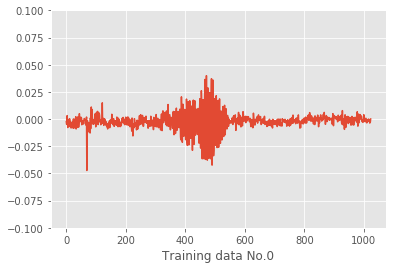

y[10] 0


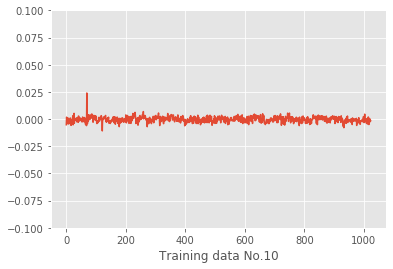

y[20] 0


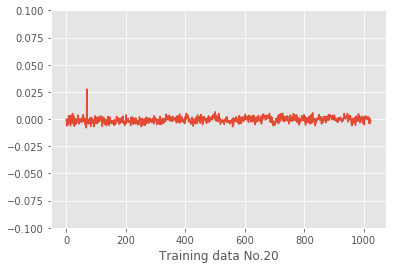

y[30] 1


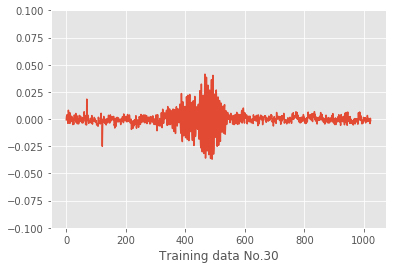

y[40] 1


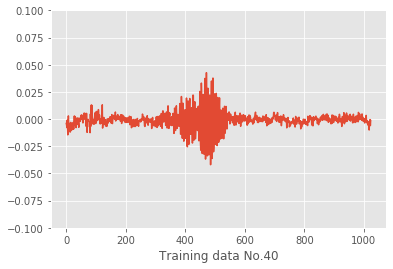

y[50] 0


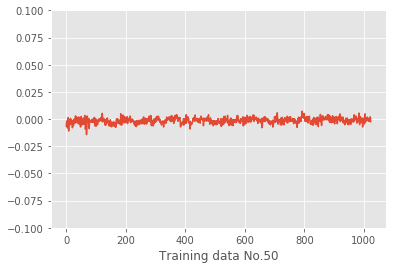

y[60] 1


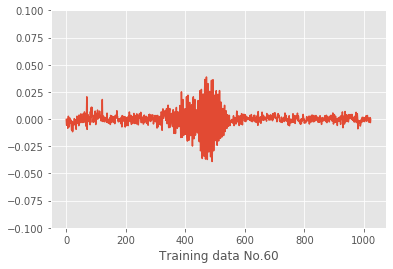

y[70] 1


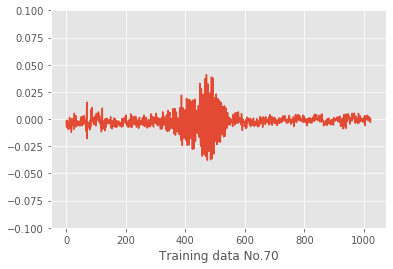

y[80] 0


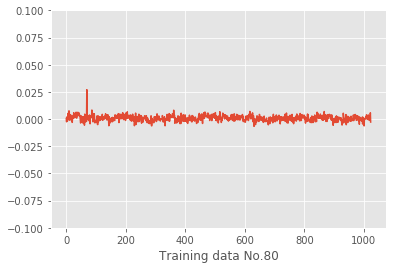

y[90] 1


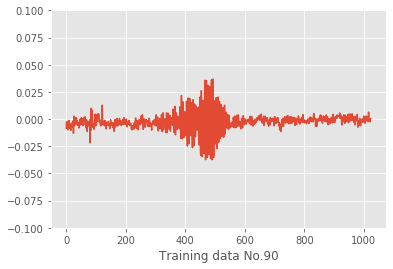

y[100] 1


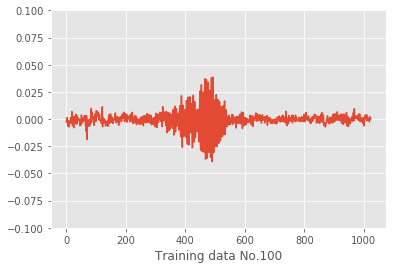

y[110] 0


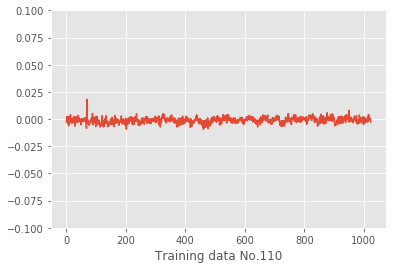

y[120] 1


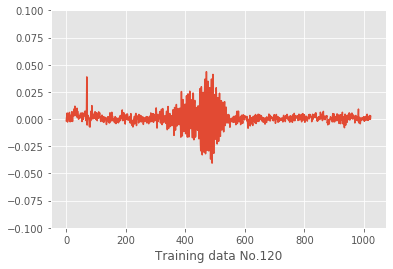

y[130] 1


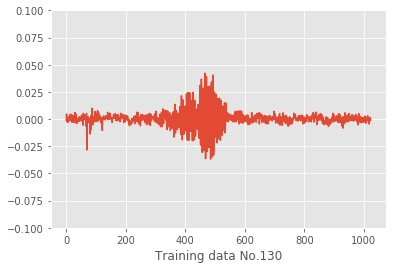

y[140] 0


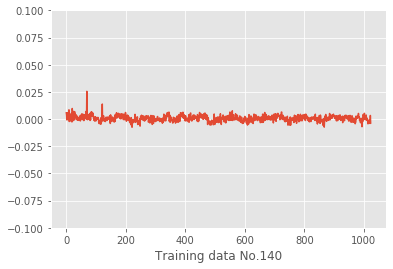

y[150] 1


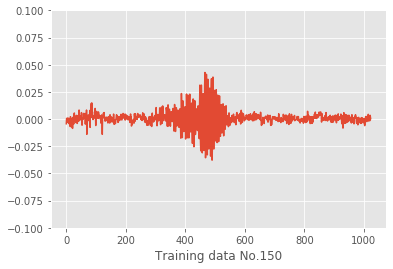

y[160] 1


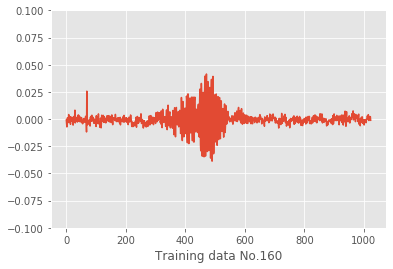

y[170] 1


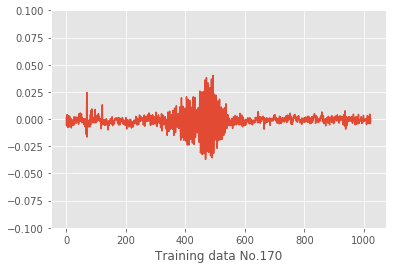

y[180] 0


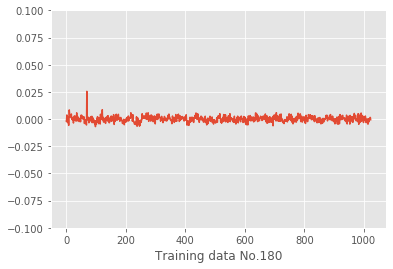

y[190] 1


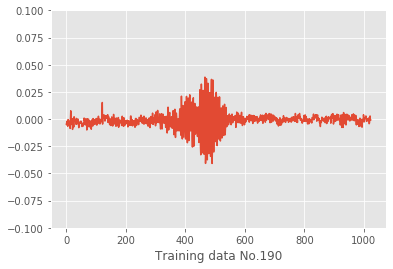

y[200] 1


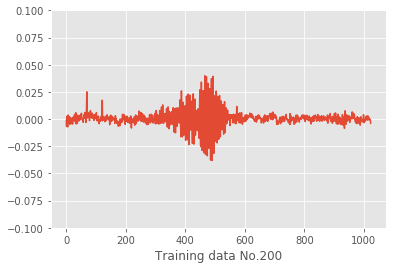

y[210] 0


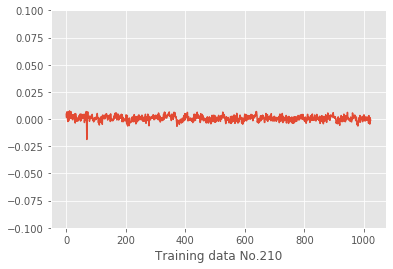

y[220] 1


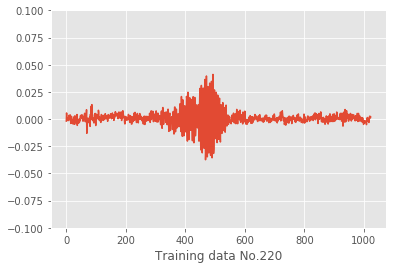

y[230] 1


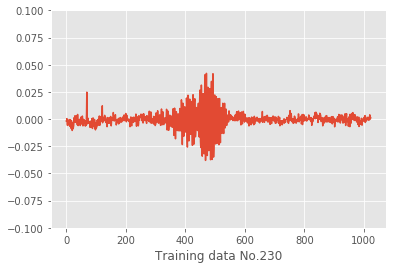

y[240] 0


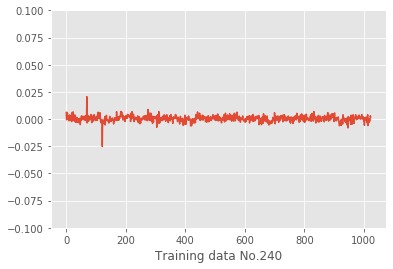

y[250] 0


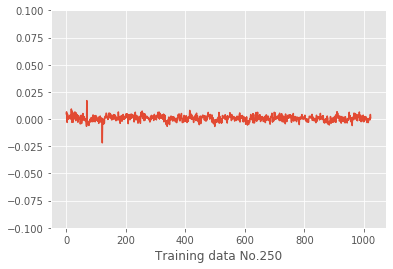

y[260] 1


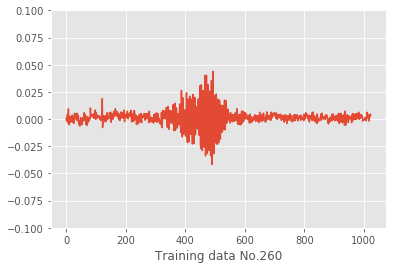

y[270] 1


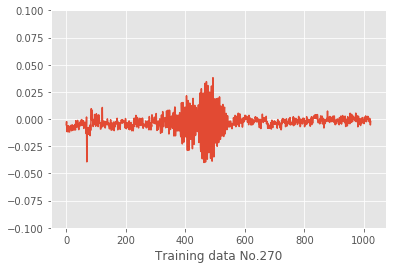

y[280] 1


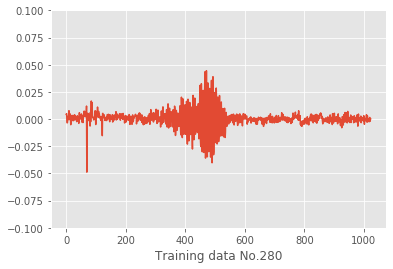

y[290] 1


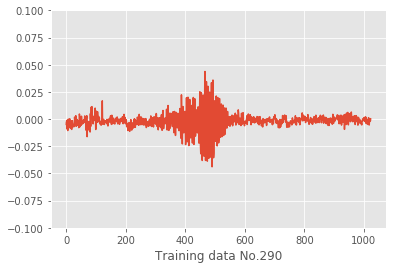

y[300] 0


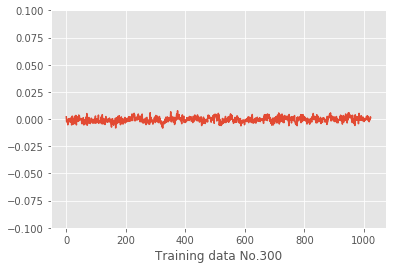

y[310] 1


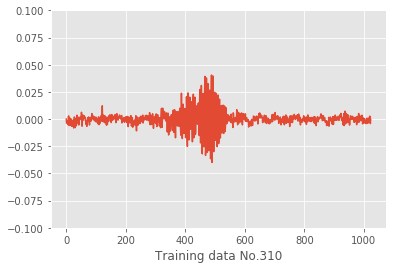

y[320] 0


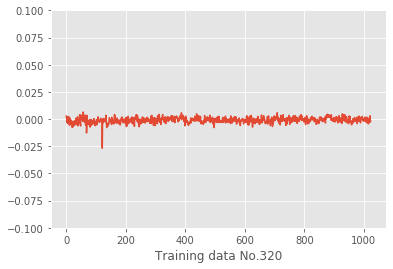

y[330] 0


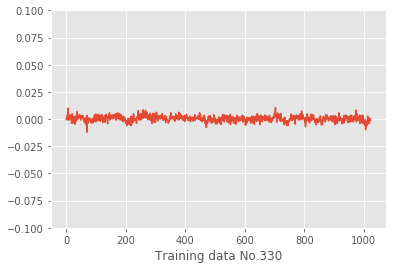

y[340] 1


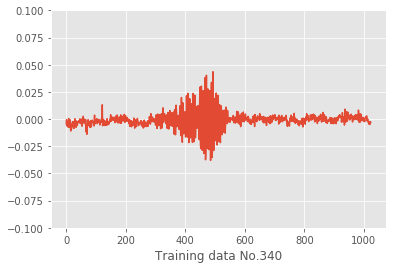

y[350] 0


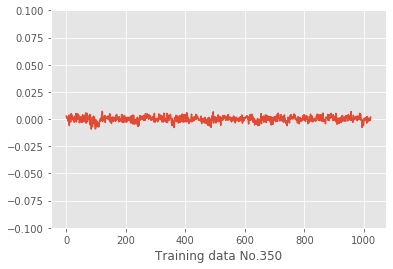

y[360] 1


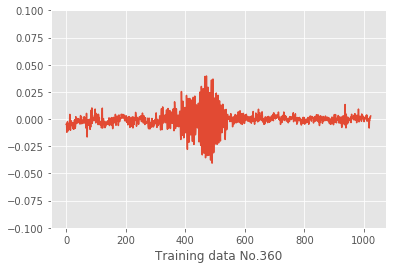

y[370] 1


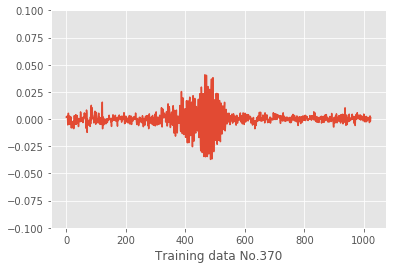

y[380] 0


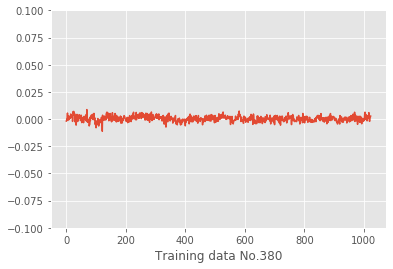

y[390] 1


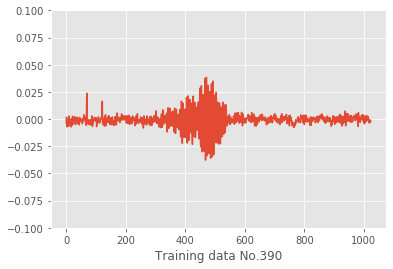

X.shape:  (2000, 1024)
y.shape:  (2000,)


<Figure size 432x288 with 0 Axes>

In [4]:
# plotting training datasets
print("Plotting X")
plt.ion()
i=0
while i<=(X.shape[0]-1)/5:
    xlabel = 'Training data No.{}'.format(i) # 直接xlabelの中で書いたらエラーがでた
    plt.xlabel(xlabel)
    plt.ylim(-Yscope,Yscope) # y axis limitation
    plt.plot(X[i,:]) # plotting data
    print("y[{}]".format(i), int(y[i]))
    plt.draw() # displaying
    plt.pause(sleepTime) # interval time
    plt.clf() # clf は　pauseの後にしないと何も表示されなかった
    i = i+skip
    
# plt.close() # closing figures
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

W0815 15:08:41.519660 4651165120 deprecation.py:506] From /Users/42t43/anaconda3/envs/tensorflow14/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0815 15:08:41.656807 4651165120 deprecation.py:323] From /Users/42t43/anaconda3/envs/tensorflow14/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1440 samples, validate on 360 samples
Epoch 1/10
1440/1440 [==============================] - 0s 138us/sample - loss: 0.4961 - acc: 0.9806 - val_loss: 0.5391 - val_acc: 0.9889
Epoch 2/10
1440/1440 [==============================] - 0s 56us/sample - loss: 0.4198 - acc: 0.9944 - val_loss: 0.5391 - val_acc: 0.9889
Epoch 3/10
1440/1440 [==============================] - 0s 41us/sample - loss: 0.4198 - acc: 0.9944 - val_loss: 0.5391 - val_acc: 0.9889
Epoch 4/10
1440/1440 [==============================] - 0s 42us/sample - loss: 0.4198 - acc: 0.9944 - val_loss: 0.5391 - val_acc: 0.9889
Epoch 5/10
1440/1440 [==============================] - 0s 40us/sample - loss: 0.4198 - acc: 0.9944 - val_loss: 0.5391 - val_acc: 0.9889
Epoch 6/10
1440/1440 [==============================] - 0s 41us/sample - loss: 0.4198 - acc: 0.9944 - val_loss: 0.5391 - val_acc: 0.9889
Epoch 7/10
1440/1440 [==============================] - 0s 51us/sample - loss: 0.4198 - acc: 0.9944 - val_loss: 0.5391 - val_acc: 

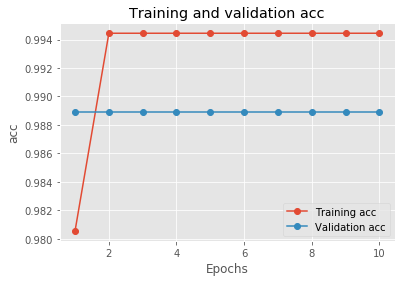

Saving model as models/model-2019-08-14-16-08-06-none-R55.h5
Model has been saved.


In [5]:
# model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=inputDim, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.relu))
# compiler
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# training
history = model.fit(X_train, y_train, epochs=epoch, validation_split=Vsplit)
model.summary()

# plotting result
plt.ioff()
plt.clf()
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc', marker="o") # "bo" is for "blue dot"
plt.plot(epochs, val_acc, label='Validation acc', marker="o") # b is for "solid blue line"
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# saving
print("Saving model as {}".format(savename))
model.save(savename)
print("Model has been saved.")

In [6]:
# testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print("X_test.shape" ,X_test.shape)
print("y_test.shape" ,y_test.shape)
print("test_loss:{}, test_acc:{}".format(test_loss, test_acc))

# predictions = model.predict([X_test])
# print(np.argmax(predictions[0]))
# print(y_test[0])
print("DONE")

200/200 [==============================] - 0s 44us/sample - loss: 0.6299 - acc: 0.9850
X_test.shape (200, 1024)
y_test.shape (200,)
test_loss:0.6299354267120362, test_acc:0.9850000143051147
DONE


### prediciton

Loading trained model

In [23]:
# loading saved model
savename = "models/model-2019-08-14-16-08-06-none-R55-good.h5"
new_model = keras.models.load_model(savename)
print(new_model.summary())
print("model[ {} ]has been loaded.".format(savename))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 131,458
Trainable params: 131,458
Non-trainable params: 0
_________________________________________________________________
None
model[ models/model-2019-08-14-16-08-06-none-R55-good.h5 ]has been loaded.


In [24]:
loss, acc = new_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

200/200 [==============================] - 0s 191us/sample - loss: 0.6299 - acc: 0.9850
Restored model, accuracy: 98.50%


予測にはXしか使用していないのでラベルは自分でわかっていればプログラムする必要はないと思う

（model.evaluateではlabelも渡すので注意）

In [25]:
def predict(data):
    print("Making prediction based on [ {} ]".format(testDataName))
    predictions = new_model.predict([data])
    print("data.shape: {}".format(data.shape))
    print("predictions.shape: {}".format(predictions.shape))
    i=0
    while i <= (predictions.shape[0]-1)/5:
        print("No.{}. Prediction:{}, argmax:{}".format(i,predictions[i,:], np.argmax(predictions[i])))
        plt.ylim(-Yscope,Yscope) # y axis limitation
        plt.plot(data[i])
        plt.show()
        i = i+skip

Loading test datasets

In [26]:
testDataName = '../data/2019-08-14-16-08-06-none-R55.csv'

# loading datasets
print('Loading test datasets ...')
df = pd.read_csv(testDataName) # loading csv data file
print('Loaded. Start preprocessing ...')
df = df.T 
df = df.drop('Unnamed: 0', axis=0) # removing unnessesary data 
labelCint = df.shape[1]-1 # label column in int
labelColumn = '{}'.format(df.shape[1]-1) # label column in str

df = sklearn.utils.shuffle(df) # no need to shuffle for test
X = df.drop(labelCint, axis=1).values # dropping label column
# X = preprocessing.scale(X) # X is feature set (effects are doutfule)
# extructing feature
if feature == 'all':
    X = X
    inputDim = int(labelCint)
if feature == 'ch1':
    X = X[:,0:int(labelCint/3)] 
    inputDim = int(labelCint/3)
if feature == 'ch2':
    X = X[:,int(labelCint/3):int(labelCint/3)*2]
    inputDim = int(labelCint/3)
if feature == 'ch1tof':
    X = X[:,int((labelCint/3)*2):int((labelCint/3)*2.5)]
    inputDim = int((labelCint/3)/2)
if feature == 'ch2tof':
    X = X[:,int((labelCint/3)*2.5):int((labelCint/3)*3)]
    inputDim = int((labelCint/3)/2)
y = df[labelCint].values # y is label

# # no need to devide dataset for testing
# X_train = X[:-test_size]
# y_train = y[:-test_size]
# X_test = X[-test_size:]
# y_test = y[-test_size:]

# print("Preprocess finished.")
# # plotting training datasets
# print("Plotting training data")
# plt.ion()
# i=0
# while i<=(X.shape[0]-1)/5:
#     xlabel = 'Test data No.{}'.format(i) # 直接xlabelの中で書いたらエラーがでた
#     plt.xlabel(xlabel)
#     plt.ylim(-Yscope,Yscope) # y axis limitation
#     plt.plot(X[i,:]) # plotting data
#     plt.draw() # displaying
#     plt.pause(sleepTime) # interval time
#     plt.clf() # clf は　pauseの後にしないと何も表示されなかった
#     i = i+skip
    
# plt.close() # closing figures
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

Loading test datasets ...
Loaded. Start preprocessing ...
X.shape:  (2000, 1024)
y.shape:  (2000,)


predict every data at once (you need correct label)

In [27]:
loss, acc = new_model.evaluate(X, y)
print("Model [ {} ], accuracy: {:5.2f}%".format(savename ,100*acc))

2000/2000 [==============================] - 0s 35us/sample - loss: 0.4623 - acc: 0.9925
Model [ models/model-2019-08-14-16-08-06-none-R55-good.h5 ], accuracy: 99.25%


check each prediction (you can cheack graph instead of labels)

Making prediction based on [ ../data/2019-08-14-16-08-06-none-R55.csv ]
data.shape: (2000, 1024)
predictions.shape: (2000, 2)
No.0. Prediction:[0.         0.04731934], argmax:1


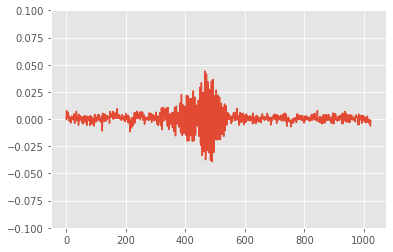

No.1. Prediction:[0.         0.03507852], argmax:1


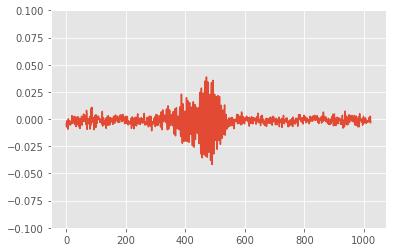

No.2. Prediction:[0. 0.], argmax:0


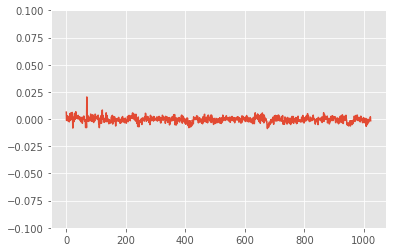

No.3. Prediction:[0.         0.04373414], argmax:1


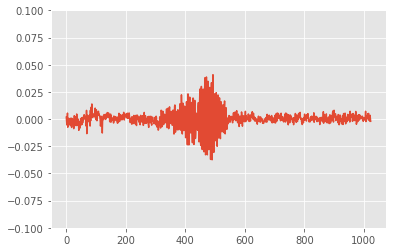

No.4. Prediction:[0. 0.], argmax:0


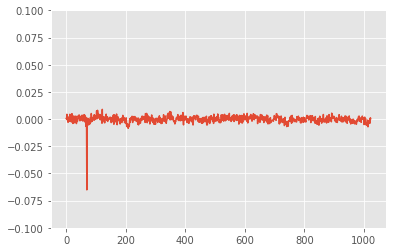

No.5. Prediction:[0.         0.03126983], argmax:1


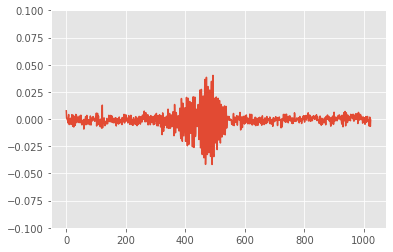

No.6. Prediction:[0.         0.03522667], argmax:1


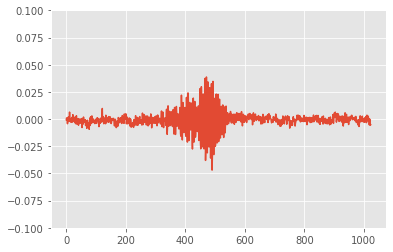

No.7. Prediction:[0.         0.04012511], argmax:1


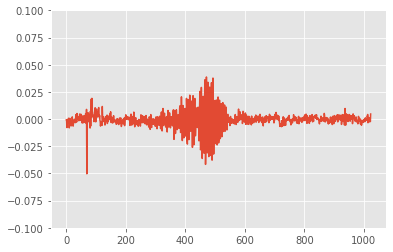

No.8. Prediction:[0. 0.], argmax:0


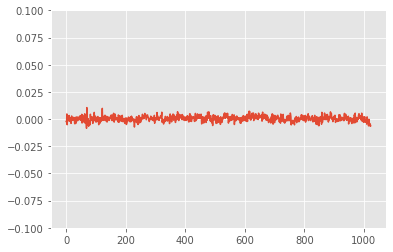

No.9. Prediction:[0. 0.], argmax:0


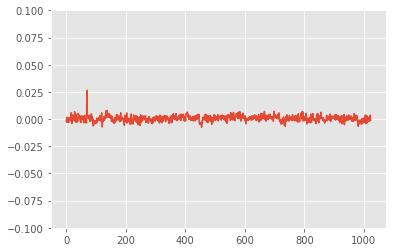

No.10. Prediction:[0. 0.], argmax:0


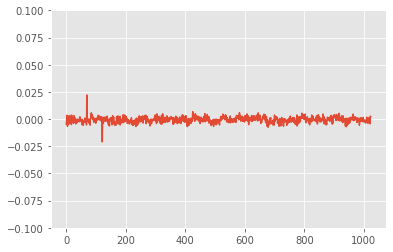

No.11. Prediction:[0.         0.03154435], argmax:1


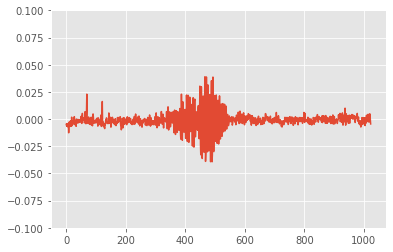

No.12. Prediction:[0.         0.03701141], argmax:1


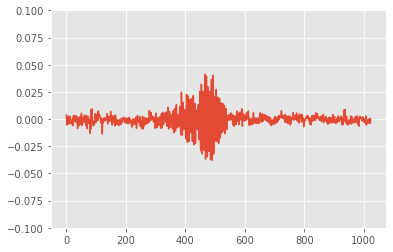

No.13. Prediction:[0.         0.03244048], argmax:1


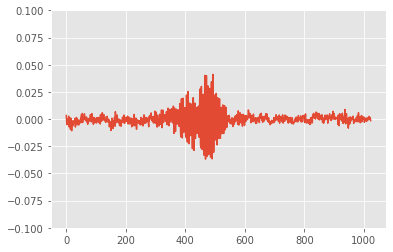

No.14. Prediction:[0. 0.], argmax:0


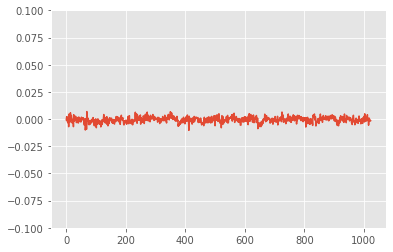

No.15. Prediction:[0.         0.03772796], argmax:1


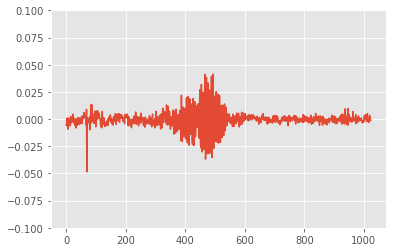

No.16. Prediction:[0.         0.01910545], argmax:1


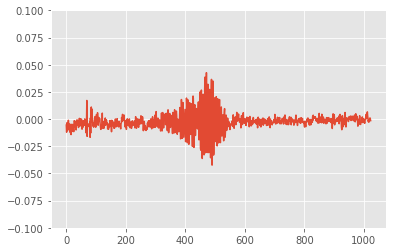

No.17. Prediction:[0.         0.03895127], argmax:1


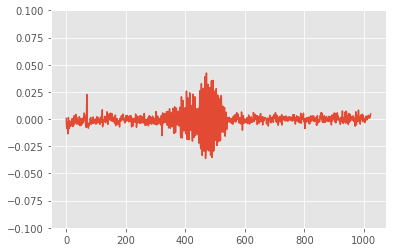

No.18. Prediction:[0. 0.], argmax:0


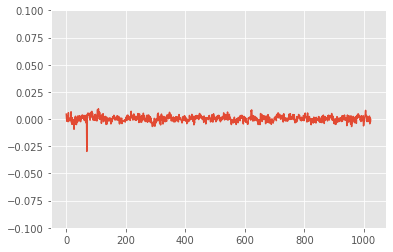

No.19. Prediction:[0.         0.04218005], argmax:1


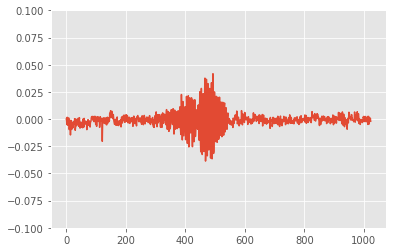

No.20. Prediction:[0.       0.035926], argmax:1


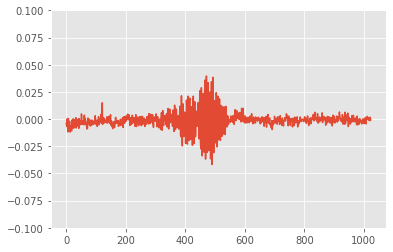

No.21. Prediction:[0. 0.], argmax:0


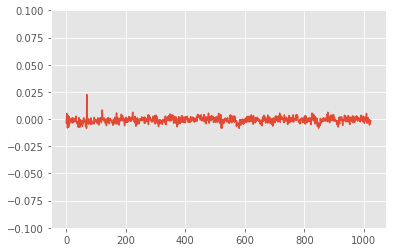

No.22. Prediction:[0. 0.], argmax:0


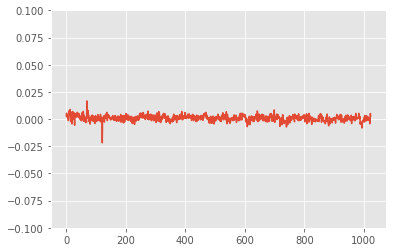

No.23. Prediction:[0. 0.], argmax:0


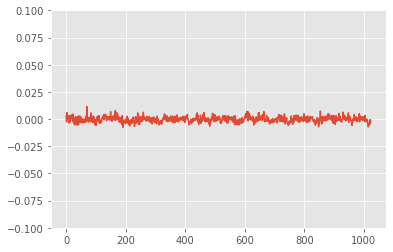

No.24. Prediction:[0.         0.02907748], argmax:1


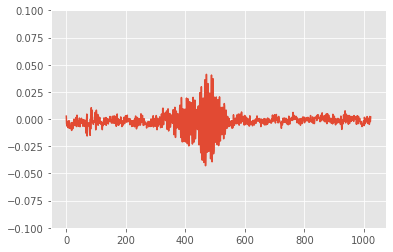

No.25. Prediction:[0. 0.], argmax:0


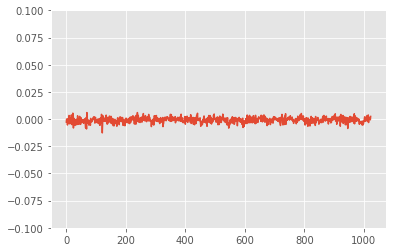

No.26. Prediction:[0.         0.03299641], argmax:1


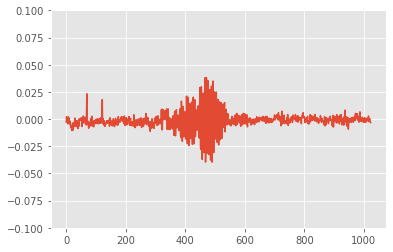

No.27. Prediction:[0.         0.04589627], argmax:1


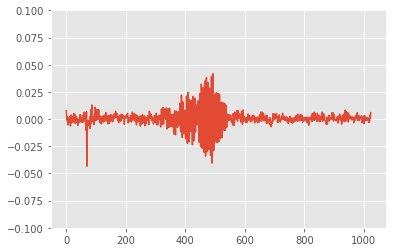

No.28. Prediction:[0.         0.03786771], argmax:1


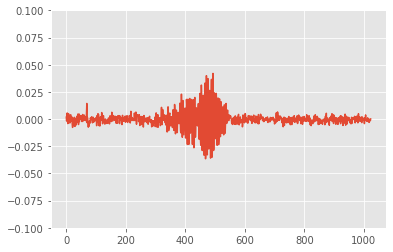

No.29. Prediction:[0.         0.03818357], argmax:1


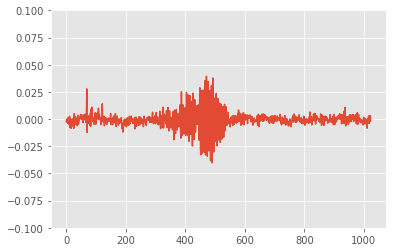

No.30. Prediction:[0.         0.03606321], argmax:1


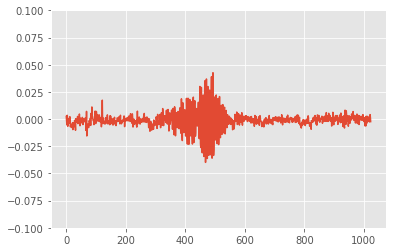

No.31. Prediction:[0.         0.02188402], argmax:1


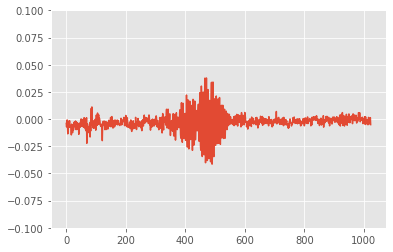

No.32. Prediction:[0. 0.], argmax:0


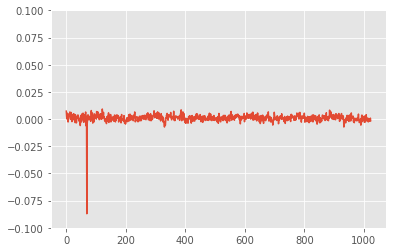

No.33. Prediction:[0.         0.03568907], argmax:1


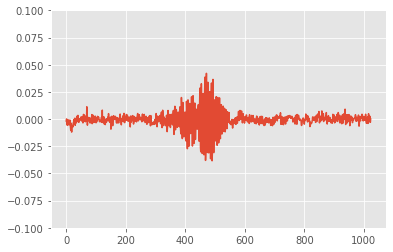

No.34. Prediction:[0.         0.03308264], argmax:1


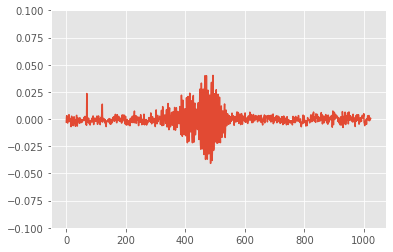

No.35. Prediction:[0. 0.], argmax:0


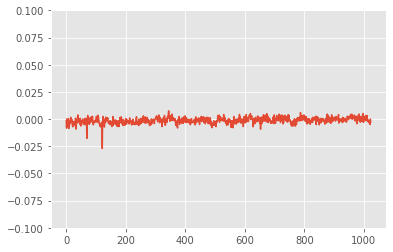

No.36. Prediction:[0.        0.0237527], argmax:1


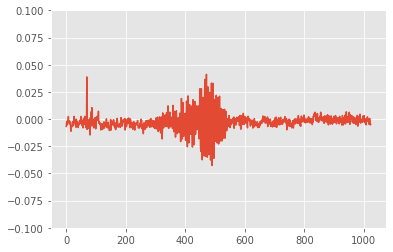

No.37. Prediction:[0.        0.0396339], argmax:1


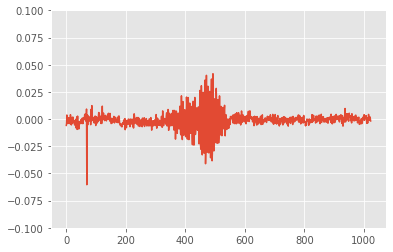

No.38. Prediction:[0. 0.], argmax:0


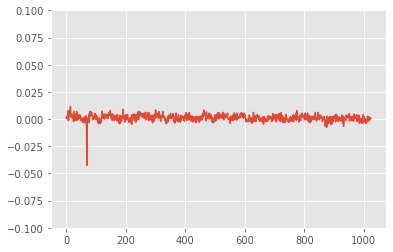

No.39. Prediction:[0.         0.02838073], argmax:1


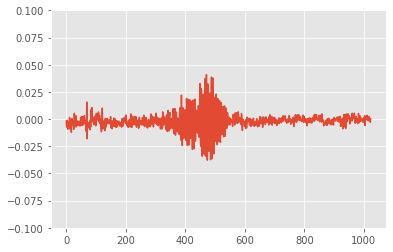

No.40. Prediction:[0.         0.03908711], argmax:1


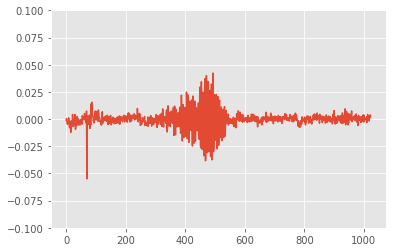

No.41. Prediction:[0.         0.02413756], argmax:1


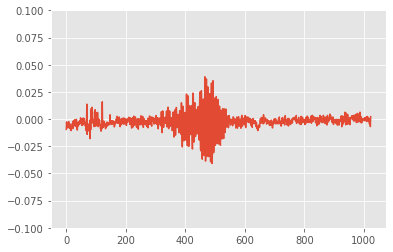

No.42. Prediction:[0. 0.], argmax:0


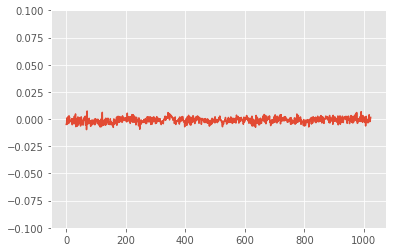

No.43. Prediction:[0.         0.01983439], argmax:1


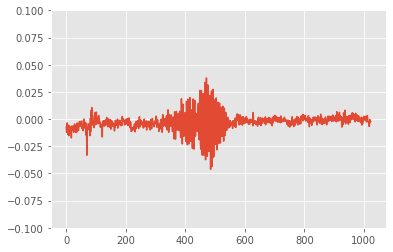

No.44. Prediction:[0. 0.], argmax:0


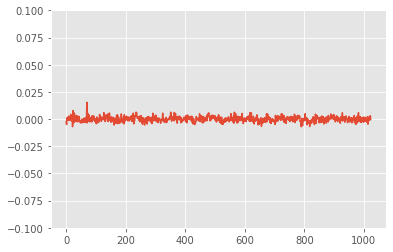

No.45. Prediction:[0. 0.], argmax:0


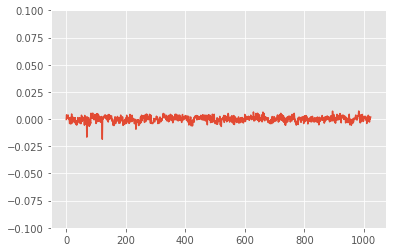

No.46. Prediction:[0. 0.], argmax:0


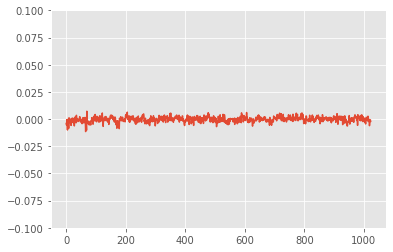

No.47. Prediction:[0. 0.], argmax:0


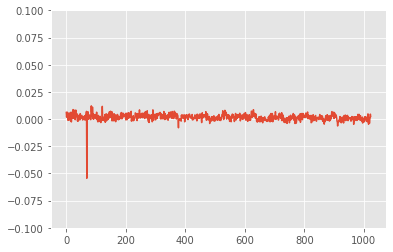

No.48. Prediction:[0. 0.], argmax:0


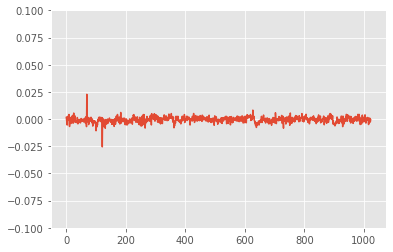

No.49. Prediction:[0.         0.03964293], argmax:1


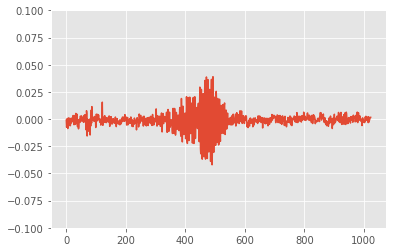

No.50. Prediction:[0.         0.03163962], argmax:1


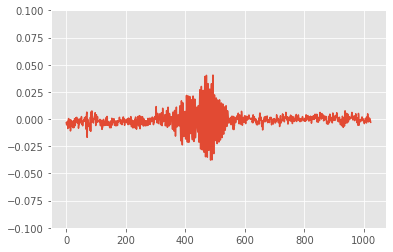

No.51. Prediction:[0.         0.04056225], argmax:1


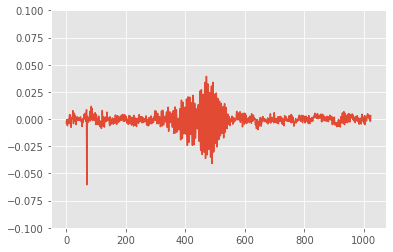

No.52. Prediction:[0.         0.03221903], argmax:1


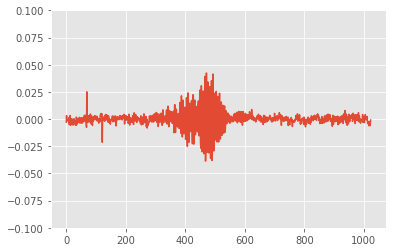

No.53. Prediction:[0.         0.03478764], argmax:1


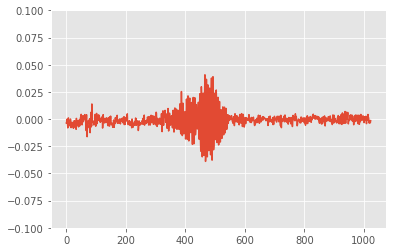

No.54. Prediction:[0. 0.], argmax:0


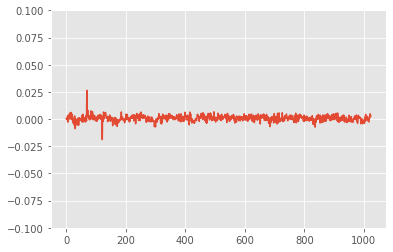

No.55. Prediction:[0. 0.], argmax:0


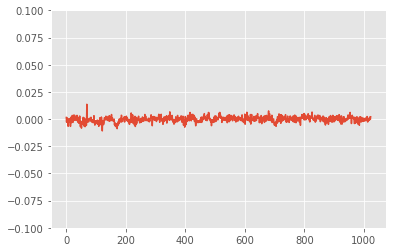

No.56. Prediction:[0. 0.], argmax:0


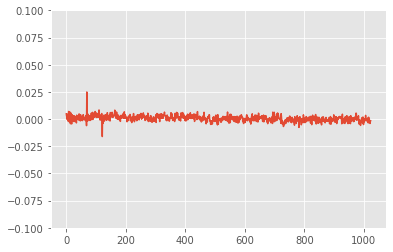

No.57. Prediction:[0.         0.03943244], argmax:1


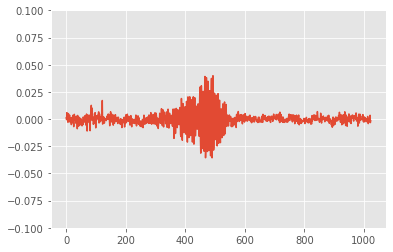

No.58. Prediction:[0.         0.02320518], argmax:1


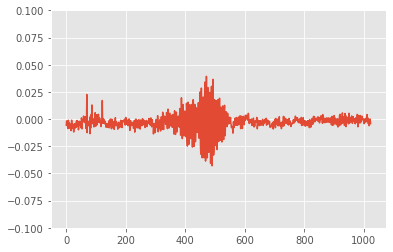

No.59. Prediction:[0. 0.], argmax:0


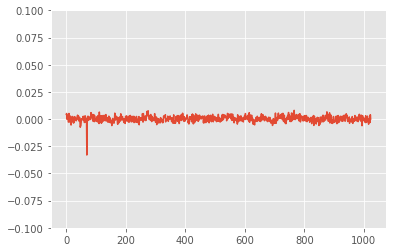

No.60. Prediction:[0. 0.], argmax:0


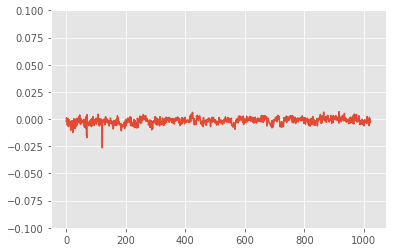

No.61. Prediction:[0.         0.04165813], argmax:1


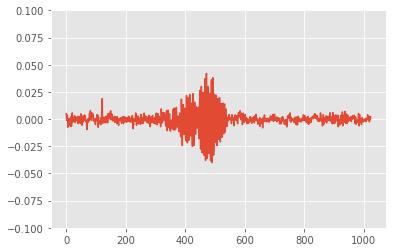

No.62. Prediction:[0.        0.0295621], argmax:1


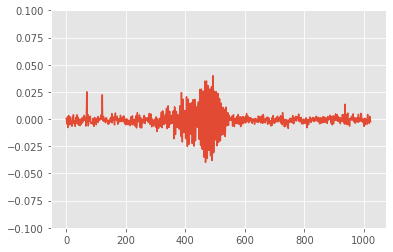

No.63. Prediction:[0. 0.], argmax:0


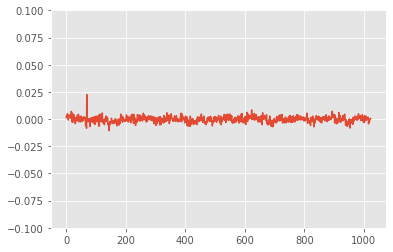

No.64. Prediction:[0.         0.02851642], argmax:1


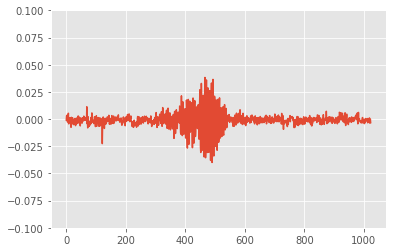

No.65. Prediction:[0.       0.033243], argmax:1


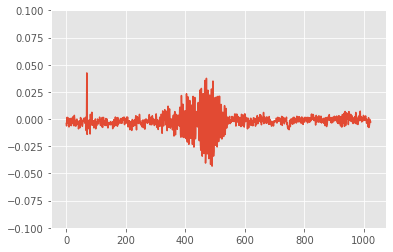

No.66. Prediction:[0. 0.], argmax:0


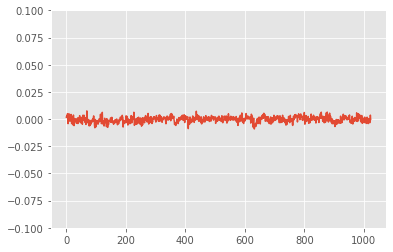

No.67. Prediction:[0. 0.], argmax:0


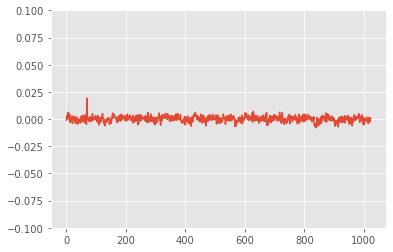

No.68. Prediction:[0.         0.02583872], argmax:1


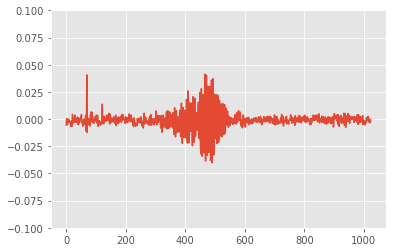

No.69. Prediction:[0.        0.0319534], argmax:1


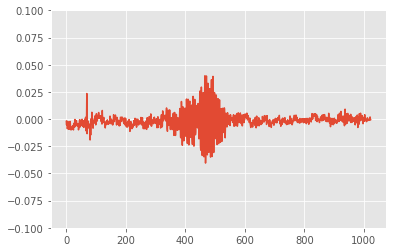

No.70. Prediction:[0. 0.], argmax:0


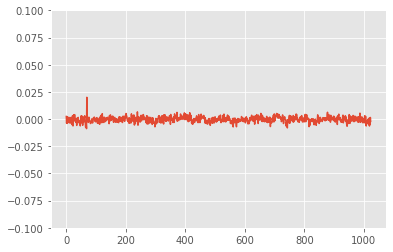

No.71. Prediction:[0. 0.], argmax:0


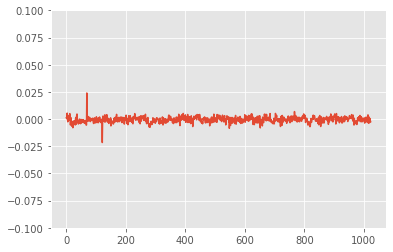

No.72. Prediction:[0.         0.03925452], argmax:1


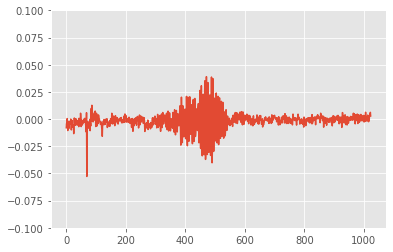

No.73. Prediction:[0. 0.], argmax:0


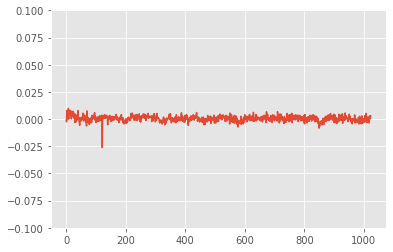

No.74. Prediction:[0.        0.0353601], argmax:1


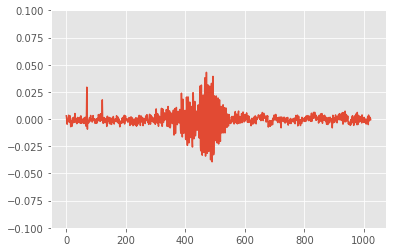

No.75. Prediction:[0. 0.], argmax:0


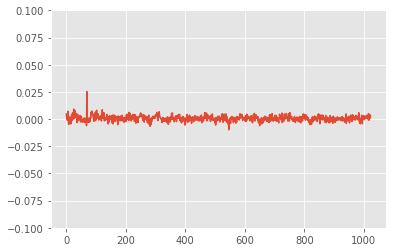

No.76. Prediction:[0.         0.02567796], argmax:1


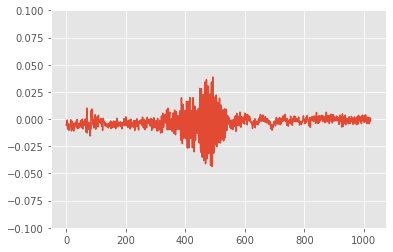

No.77. Prediction:[0.         0.02957642], argmax:1


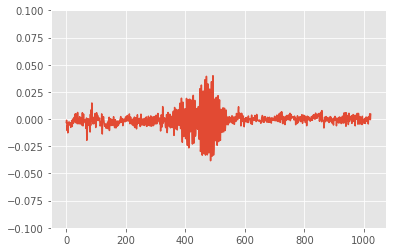

No.78. Prediction:[0.         0.01854186], argmax:1


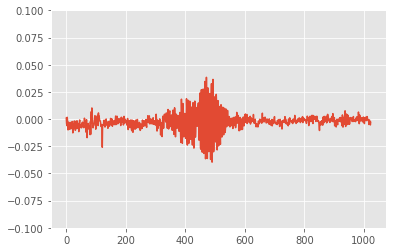

No.79. Prediction:[0. 0.], argmax:0


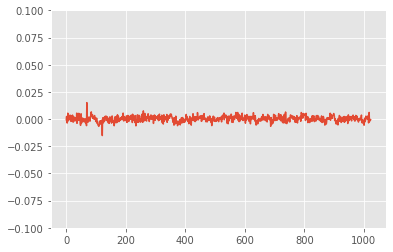

No.80. Prediction:[0.         0.01919164], argmax:1


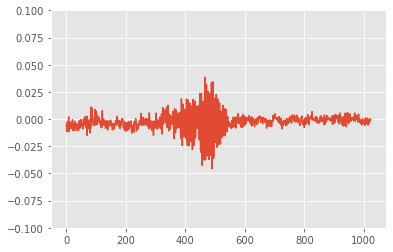

No.81. Prediction:[0.         0.04464291], argmax:1


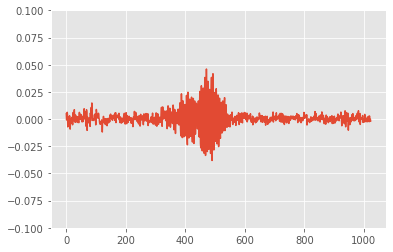

No.82. Prediction:[0.         0.04920502], argmax:1


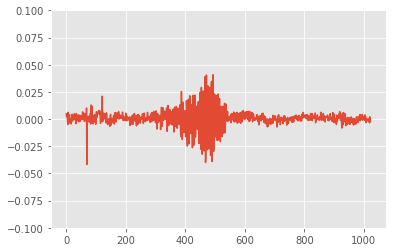

No.83. Prediction:[0.         0.02622411], argmax:1


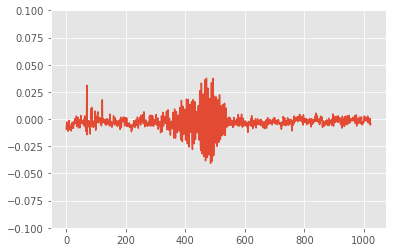

No.84. Prediction:[0.         0.01839572], argmax:1


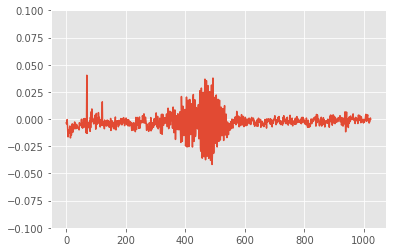

No.85. Prediction:[0.         0.04327093], argmax:1


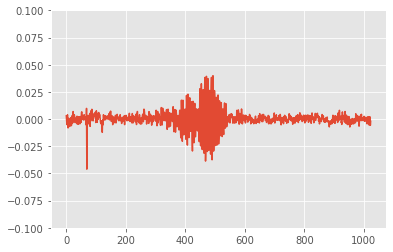

No.86. Prediction:[0.         0.03592698], argmax:1


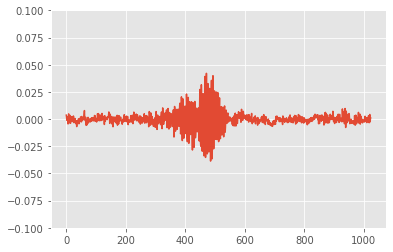

No.87. Prediction:[0.         0.03168422], argmax:1


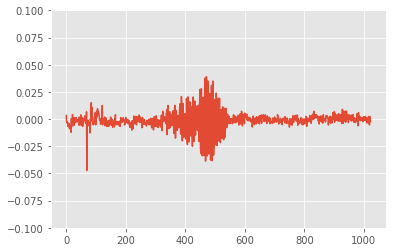

No.88. Prediction:[0.       8.126874], argmax:1


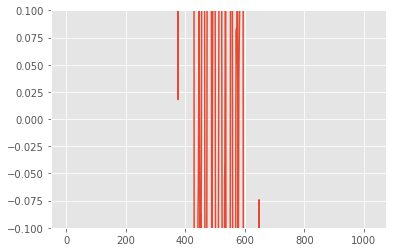

No.89. Prediction:[0. 0.], argmax:0


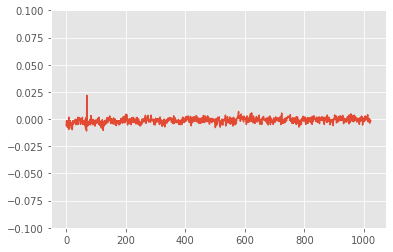

No.90. Prediction:[0.         0.03658006], argmax:1


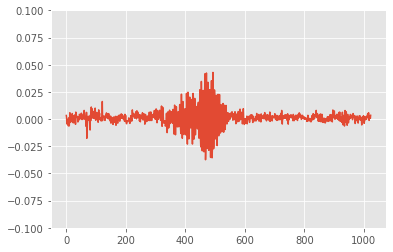

No.91. Prediction:[0.         0.03224019], argmax:1


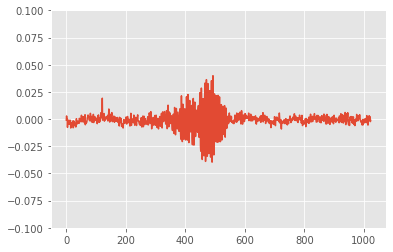

No.92. Prediction:[0.      8.10853], argmax:1


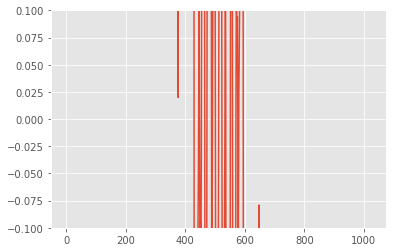

No.93. Prediction:[0.         0.02409937], argmax:1


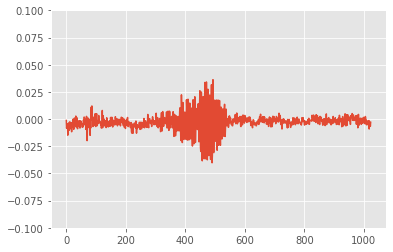

No.94. Prediction:[0. 0.], argmax:0


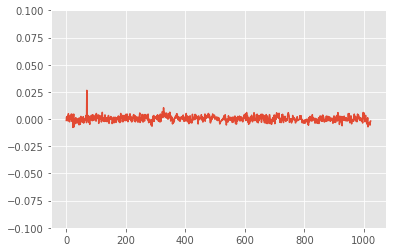

No.95. Prediction:[0. 0.], argmax:0


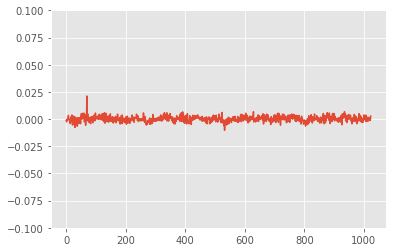

No.96. Prediction:[0. 0.], argmax:0


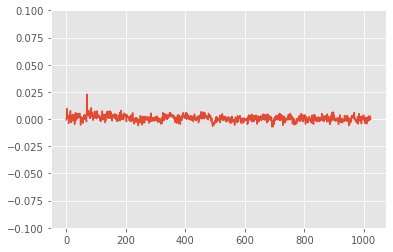

No.97. Prediction:[0.         0.03800198], argmax:1


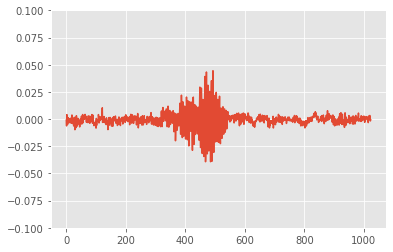

No.98. Prediction:[0.        0.0345839], argmax:1


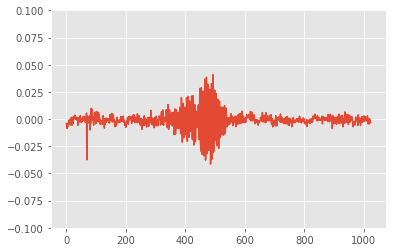

No.99. Prediction:[0. 0.], argmax:0


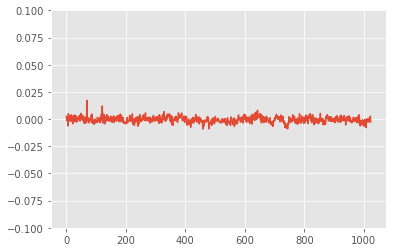

No.100. Prediction:[0.         0.03196226], argmax:1


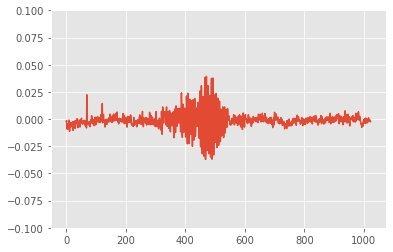

No.101. Prediction:[0.         0.03762266], argmax:1


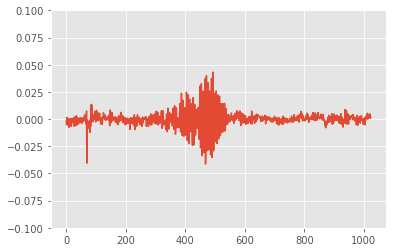

No.102. Prediction:[0. 0.], argmax:0


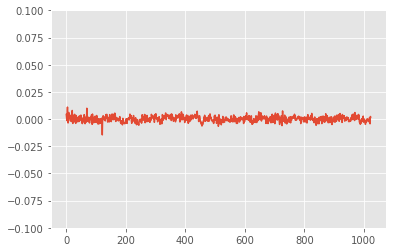

No.103. Prediction:[0. 0.], argmax:0


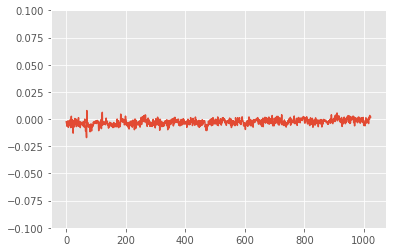

No.104. Prediction:[0. 0.], argmax:0


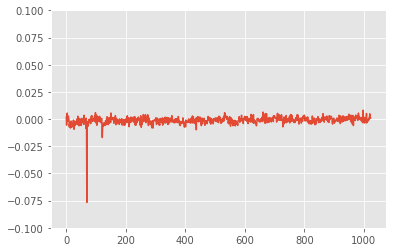

No.105. Prediction:[0. 0.], argmax:0


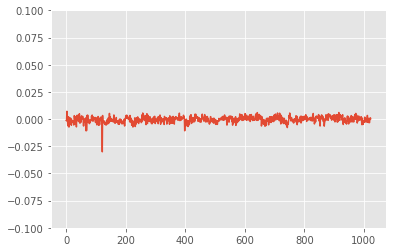

No.106. Prediction:[0. 0.], argmax:0


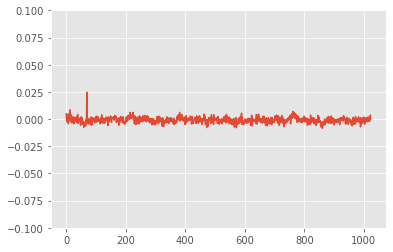

No.107. Prediction:[0. 0.], argmax:0


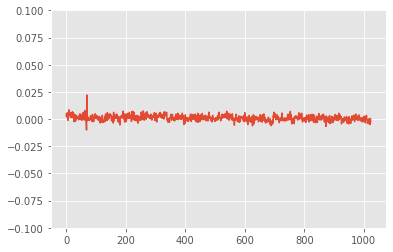

No.108. Prediction:[0. 0.], argmax:0


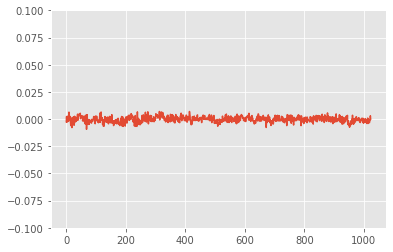

No.109. Prediction:[0. 0.], argmax:0


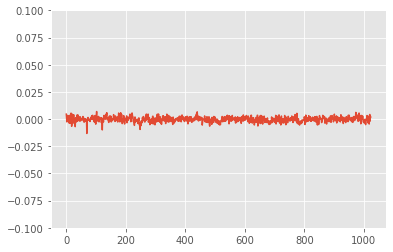

No.110. Prediction:[0.         0.03530607], argmax:1


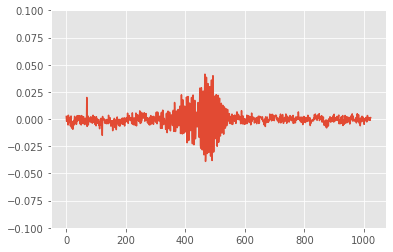

No.111. Prediction:[0. 0.], argmax:0


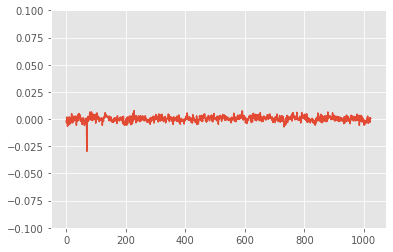

No.112. Prediction:[0. 0.], argmax:0


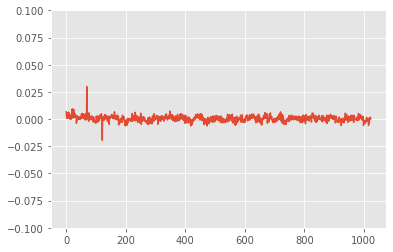

No.113. Prediction:[0. 0.], argmax:0


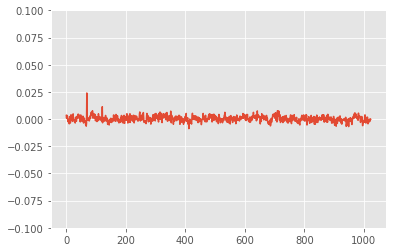

No.114. Prediction:[0.         0.03441826], argmax:1


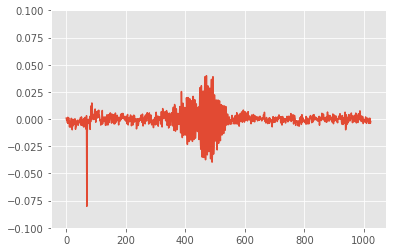

No.115. Prediction:[0.         0.02650584], argmax:1


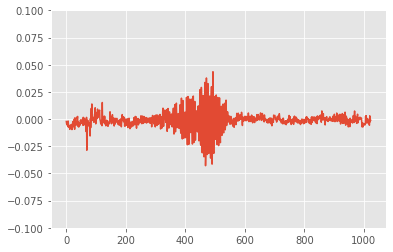

No.116. Prediction:[0.         0.04781188], argmax:1


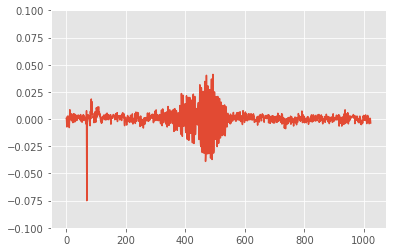

No.117. Prediction:[0.         0.02779729], argmax:1


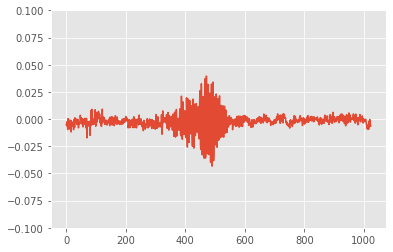

No.118. Prediction:[0. 0.], argmax:0


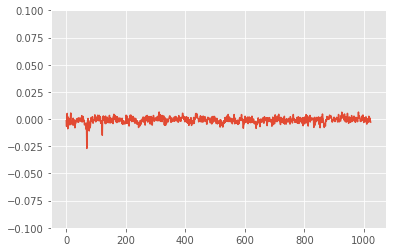

No.119. Prediction:[0.         0.01819303], argmax:1


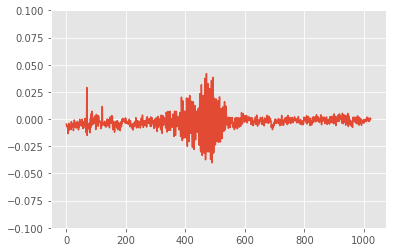

No.120. Prediction:[0.       0.015337], argmax:1


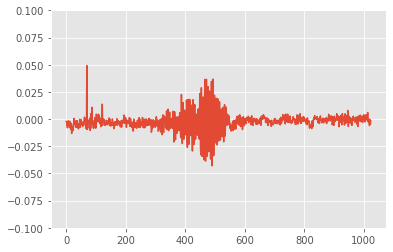

No.121. Prediction:[0. 0.], argmax:0


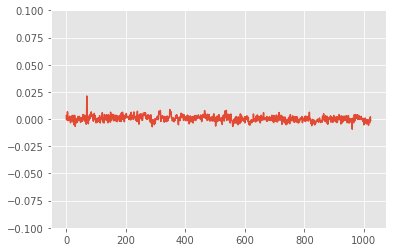

No.122. Prediction:[0.         0.01568398], argmax:1


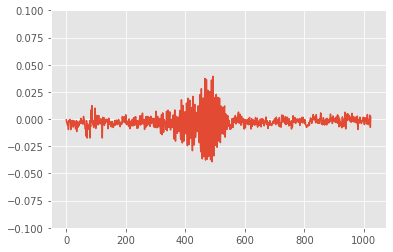

No.123. Prediction:[0. 0.], argmax:0


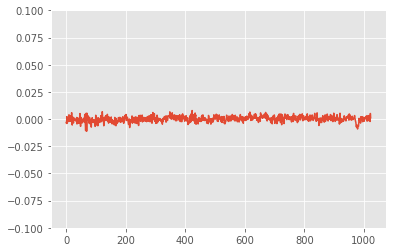

No.124. Prediction:[0.         0.03462258], argmax:1


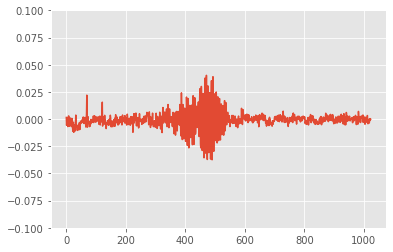

No.125. Prediction:[0.         0.04887818], argmax:1


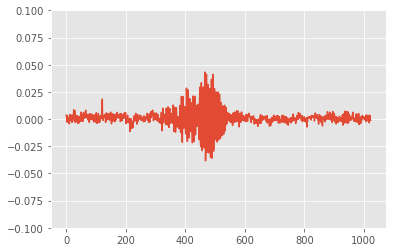

No.126. Prediction:[0. 0.], argmax:0


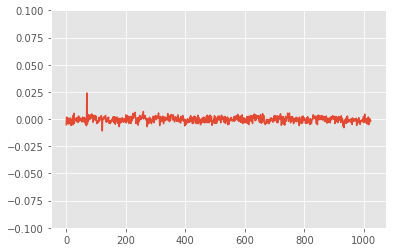

No.127. Prediction:[0.         0.03656874], argmax:1


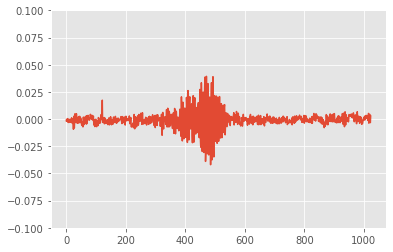

No.128. Prediction:[0. 0.], argmax:0


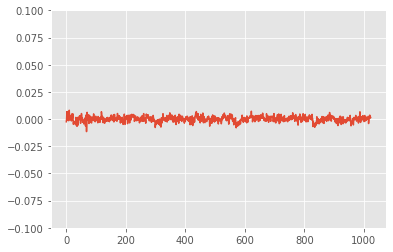

No.129. Prediction:[0.         0.03192021], argmax:1


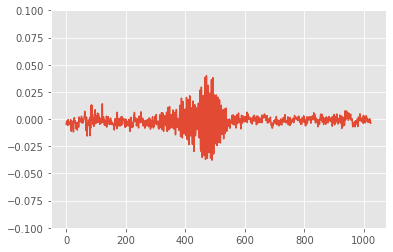

No.130. Prediction:[0. 0.], argmax:0


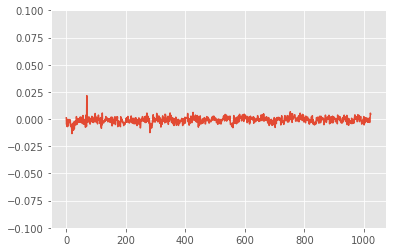

No.131. Prediction:[0. 0.], argmax:0


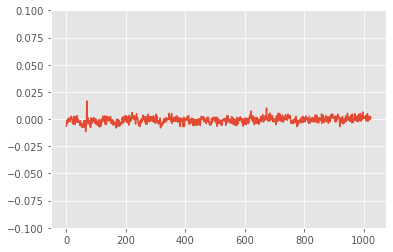

No.132. Prediction:[0. 0.], argmax:0


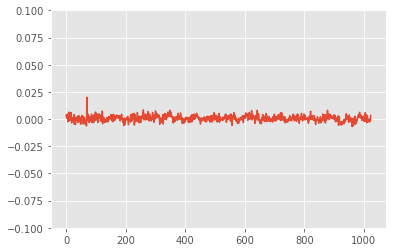

No.133. Prediction:[0.         0.04373843], argmax:1


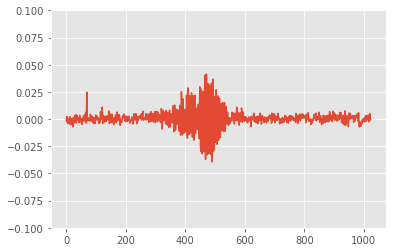

No.134. Prediction:[0. 0.], argmax:0


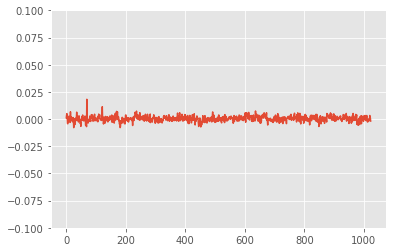

No.135. Prediction:[0. 0.], argmax:0


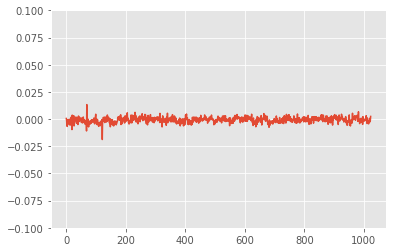

No.136. Prediction:[0.         0.03064143], argmax:1


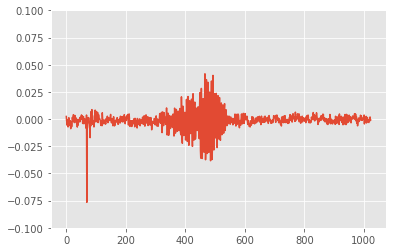

No.137. Prediction:[0. 0.], argmax:0


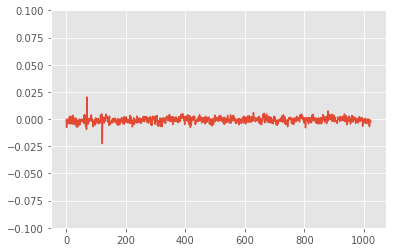

No.138. Prediction:[0.         0.03356924], argmax:1


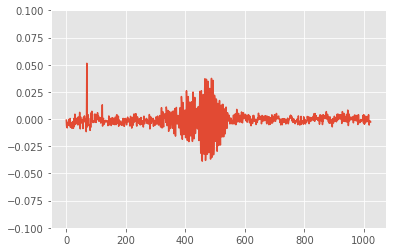

No.139. Prediction:[0.         0.02603609], argmax:1


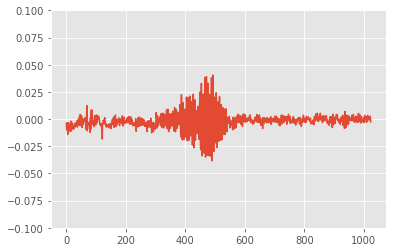

No.140. Prediction:[0. 0.], argmax:0


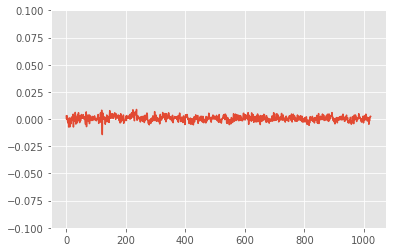

No.141. Prediction:[0. 0.], argmax:0


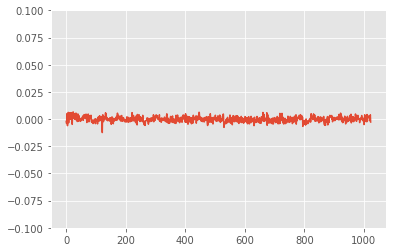

No.142. Prediction:[0. 0.], argmax:0


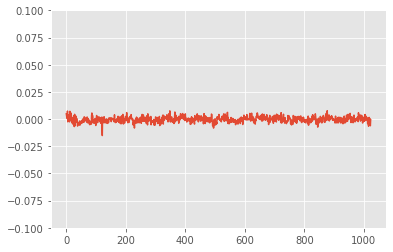

No.143. Prediction:[0.         0.03683298], argmax:1


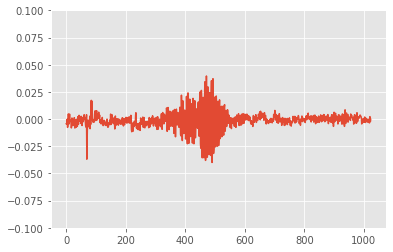

No.144. Prediction:[0. 0.], argmax:0


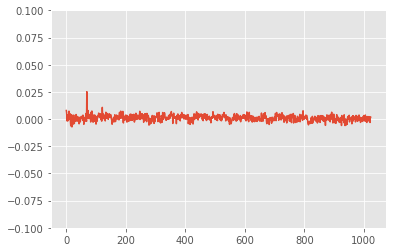

No.145. Prediction:[0.         0.01884396], argmax:1


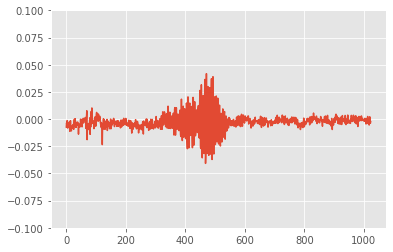

No.146. Prediction:[0.        0.0401005], argmax:1


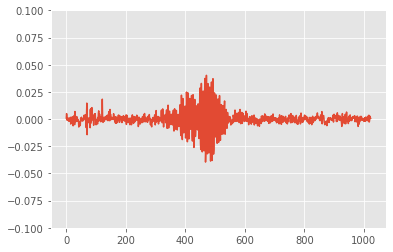

No.147. Prediction:[0.         0.03708203], argmax:1


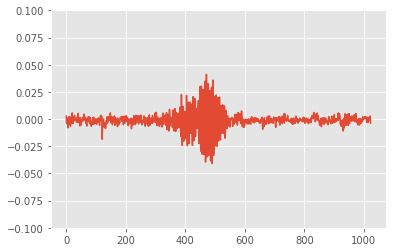

No.148. Prediction:[0.         0.01889138], argmax:1


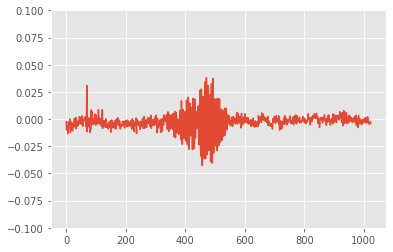

No.149. Prediction:[0. 0.], argmax:0


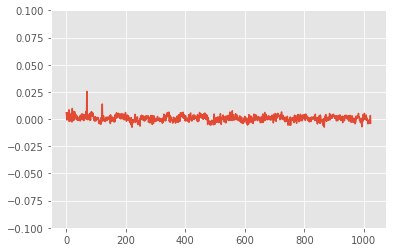

No.150. Prediction:[0. 0.], argmax:0


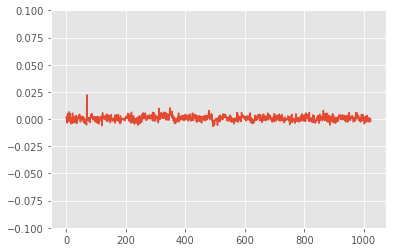

No.151. Prediction:[0.         0.02667494], argmax:1


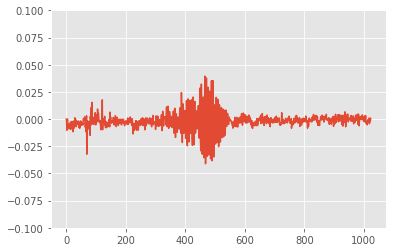

No.152. Prediction:[0.         0.02471871], argmax:1


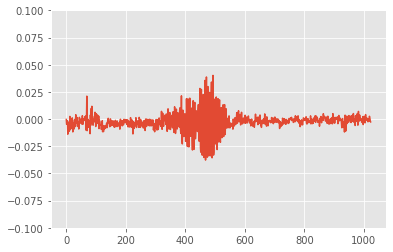

No.153. Prediction:[0. 0.], argmax:0


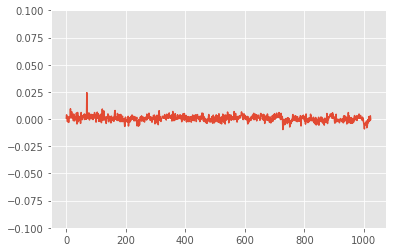

No.154. Prediction:[0. 0.], argmax:0


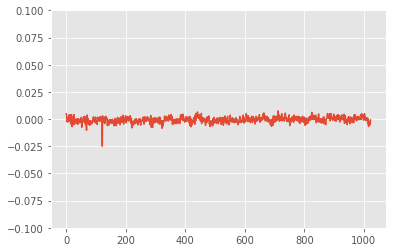

No.155. Prediction:[0.         0.02651809], argmax:1


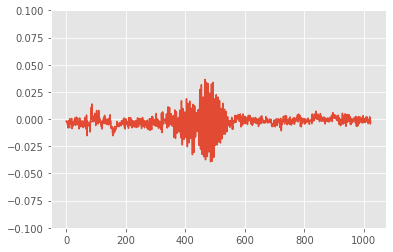

No.156. Prediction:[0. 0.], argmax:0


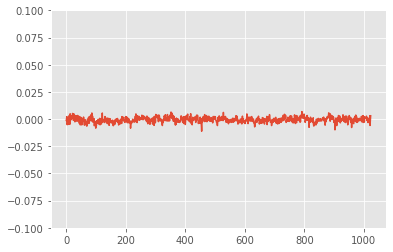

No.157. Prediction:[0. 0.], argmax:0


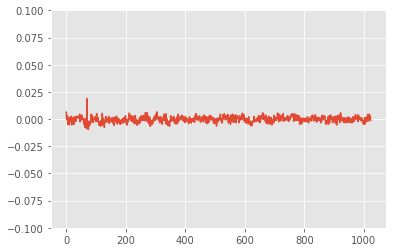

No.158. Prediction:[0.      8.11745], argmax:1


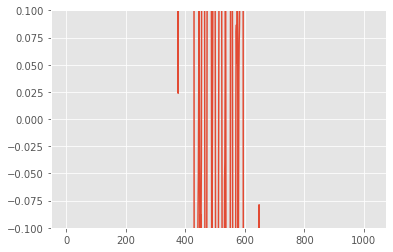

No.159. Prediction:[0. 0.], argmax:0


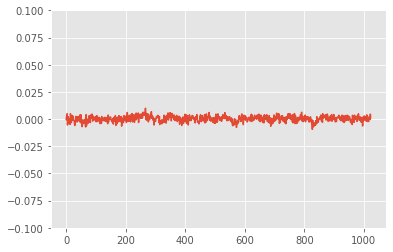

No.160. Prediction:[0. 0.], argmax:0


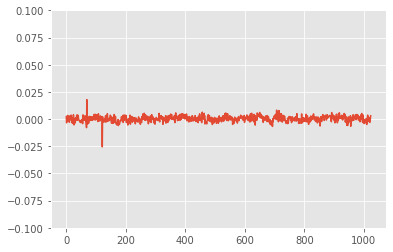

No.161. Prediction:[0. 0.], argmax:0


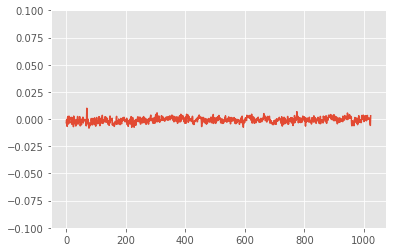

No.162. Prediction:[0. 0.], argmax:0


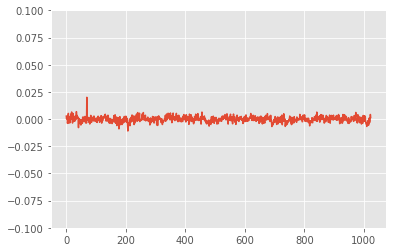

No.163. Prediction:[0.         0.04241559], argmax:1


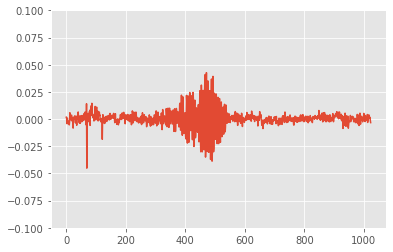

No.164. Prediction:[0.         0.03680946], argmax:1


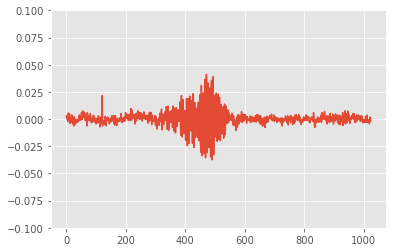

No.165. Prediction:[0.         0.03263598], argmax:1


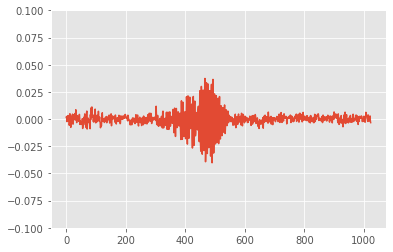

No.166. Prediction:[0.         0.04376379], argmax:1


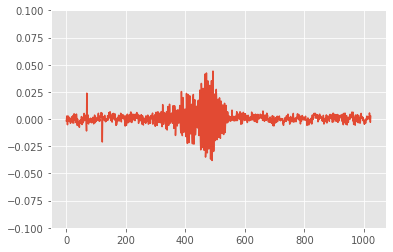

No.167. Prediction:[0. 0.], argmax:0


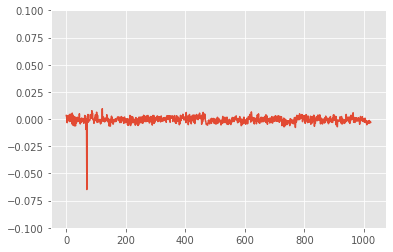

No.168. Prediction:[0. 0.], argmax:0


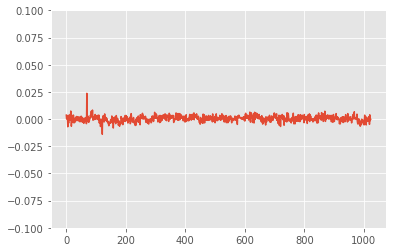

No.169. Prediction:[0.         0.02215463], argmax:1


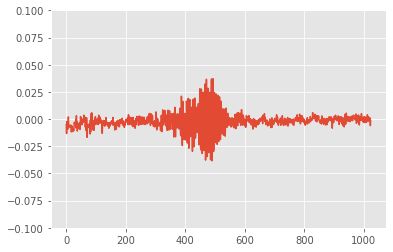

No.170. Prediction:[0.         0.03676729], argmax:1


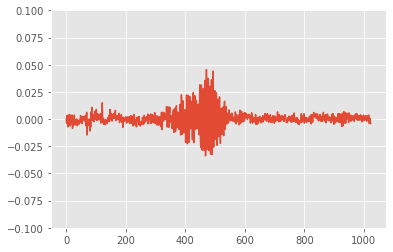

No.171. Prediction:[0. 0.], argmax:0


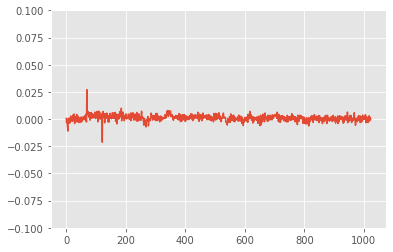

No.172. Prediction:[0. 0.], argmax:0


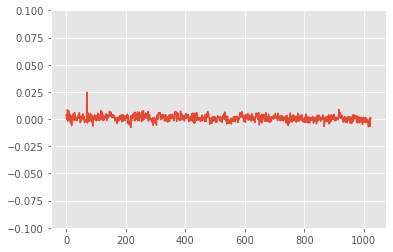

No.173. Prediction:[0. 0.], argmax:0


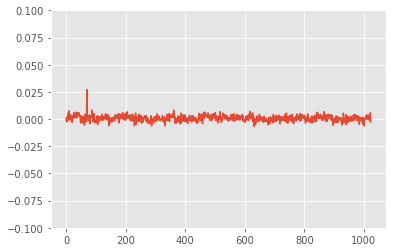

No.174. Prediction:[0.       8.115905], argmax:1


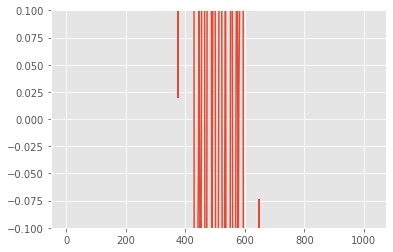

No.175. Prediction:[0.         0.03093924], argmax:1


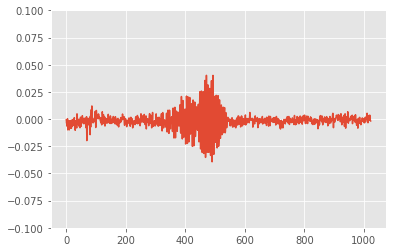

No.176. Prediction:[0. 0.], argmax:0


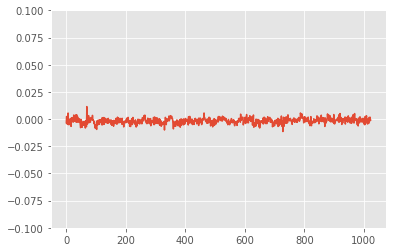

No.177. Prediction:[0.         0.03675861], argmax:1


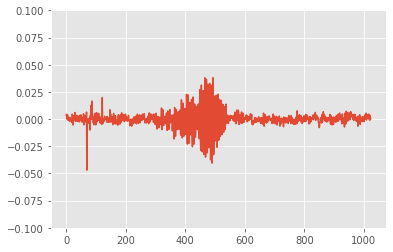

No.178. Prediction:[0. 0.], argmax:0


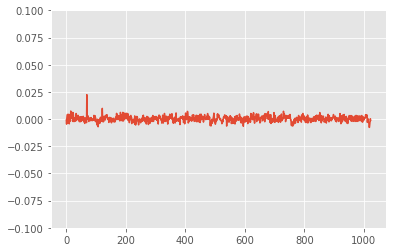

No.179. Prediction:[0.         0.04010629], argmax:1


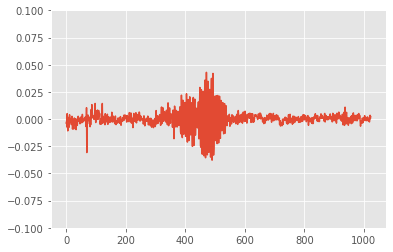

No.180. Prediction:[0. 0.], argmax:0


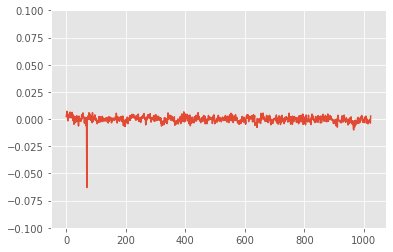

No.181. Prediction:[0. 0.], argmax:0


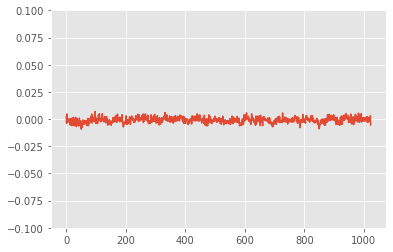

No.182. Prediction:[0.         0.04518749], argmax:1


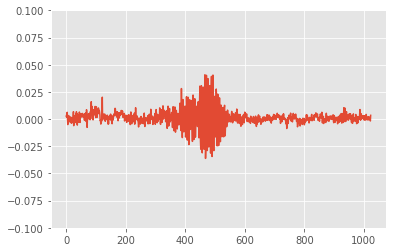

No.183. Prediction:[0.         0.02706697], argmax:1


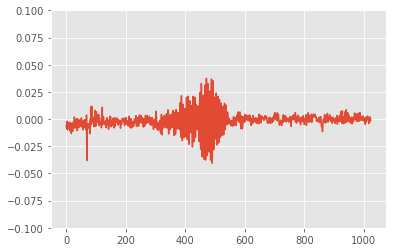

No.184. Prediction:[0.         0.01713819], argmax:1


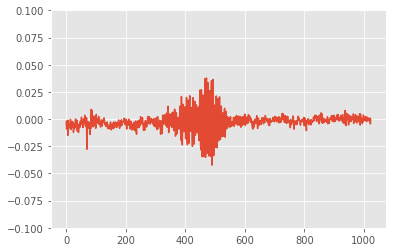

No.185. Prediction:[0. 0.], argmax:0


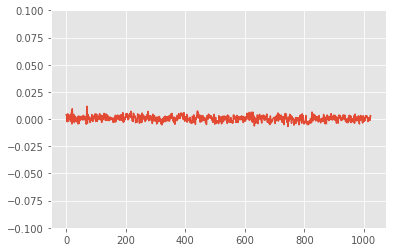

No.186. Prediction:[0. 0.], argmax:0


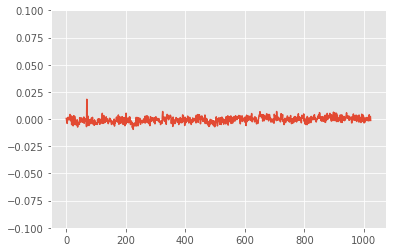

No.187. Prediction:[0.         0.04188079], argmax:1


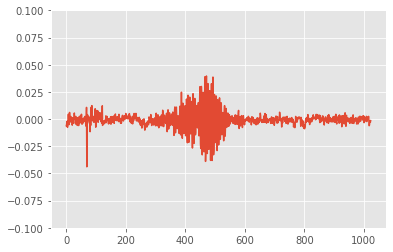

No.188. Prediction:[0.        0.0152183], argmax:1


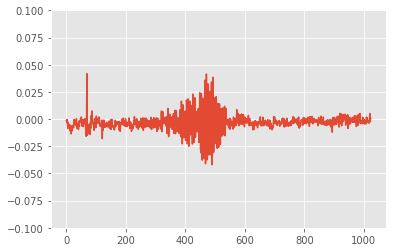

No.189. Prediction:[0. 0.], argmax:0


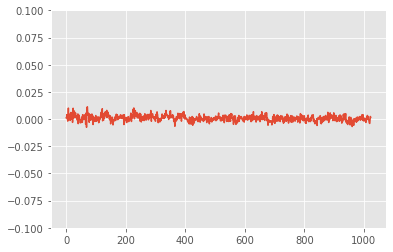

No.190. Prediction:[0. 0.], argmax:0


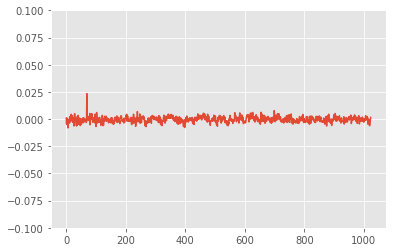

No.191. Prediction:[0.         0.02102788], argmax:1


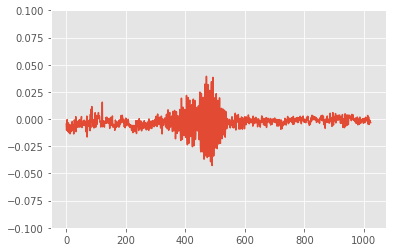

No.192. Prediction:[0. 0.], argmax:0


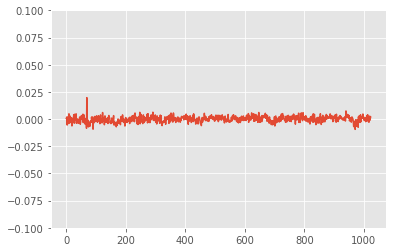

No.193. Prediction:[0.         0.01822625], argmax:1


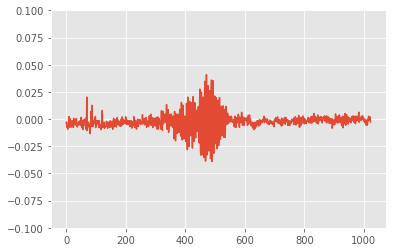

No.194. Prediction:[0. 0.], argmax:0


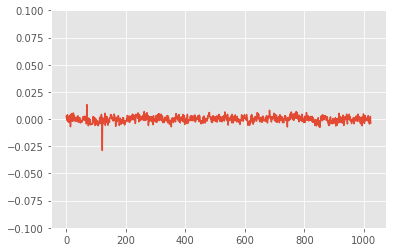

No.195. Prediction:[0.        0.0236698], argmax:1


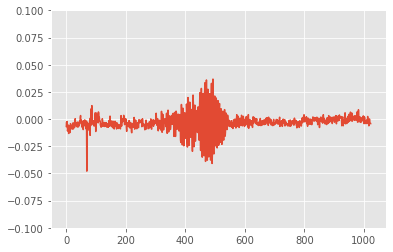

No.196. Prediction:[0.         0.02528704], argmax:1


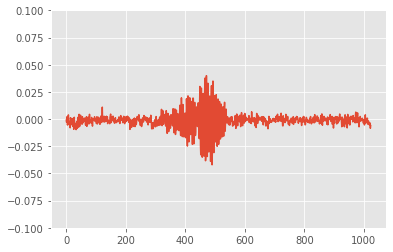

No.197. Prediction:[0. 0.], argmax:0


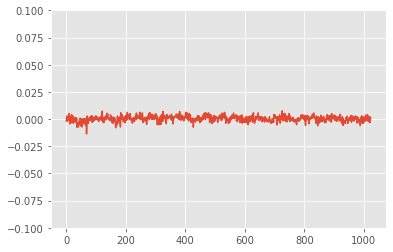

No.198. Prediction:[0. 0.], argmax:0


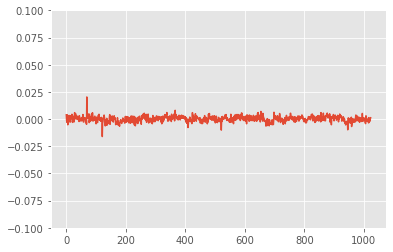

No.199. Prediction:[0.         0.02813029], argmax:1


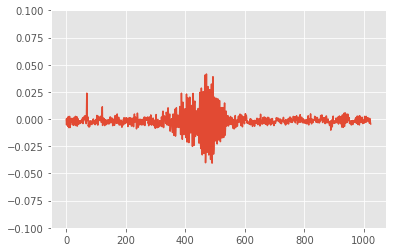

No.200. Prediction:[0. 0.], argmax:0


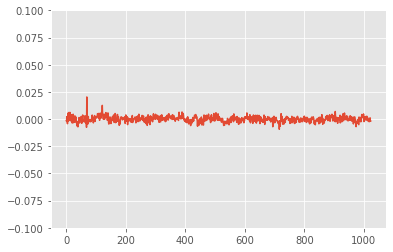

No.201. Prediction:[0. 0.], argmax:0


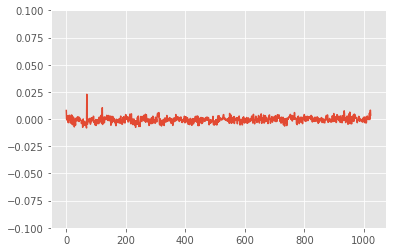

No.202. Prediction:[0.        0.0431093], argmax:1


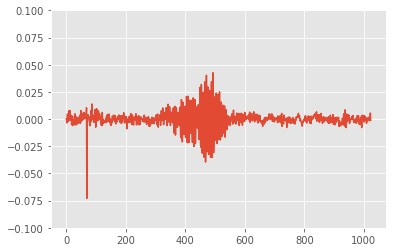

No.203. Prediction:[0.         0.02992085], argmax:1


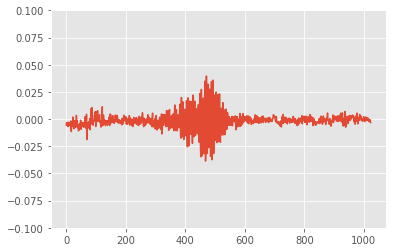

No.204. Prediction:[0.         0.02358991], argmax:1


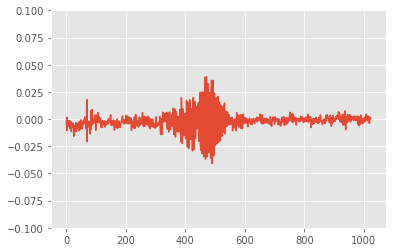

No.205. Prediction:[0. 0.], argmax:0


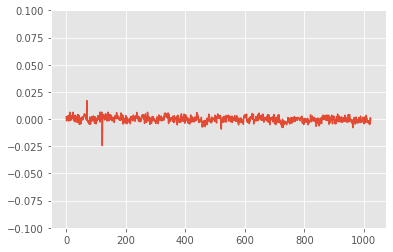

No.206. Prediction:[0. 0.], argmax:0


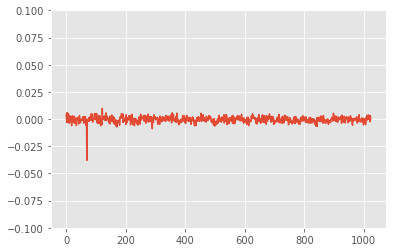

No.207. Prediction:[0.       8.113965], argmax:1


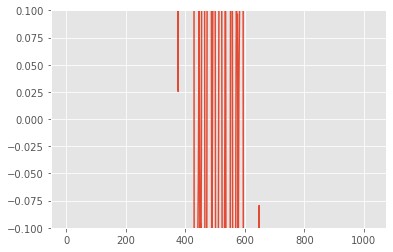

No.208. Prediction:[0. 0.], argmax:0


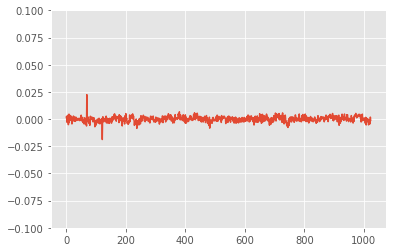

No.209. Prediction:[0.         0.02993357], argmax:1


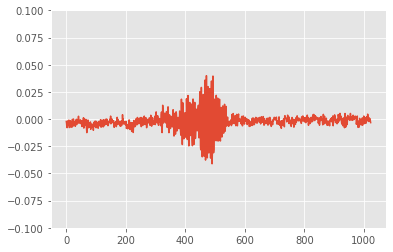

No.210. Prediction:[0. 0.], argmax:0


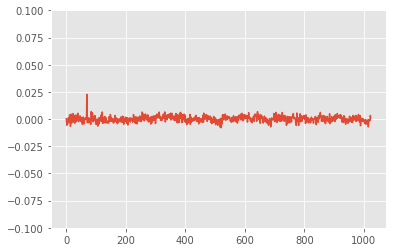

No.211. Prediction:[0. 0.], argmax:0


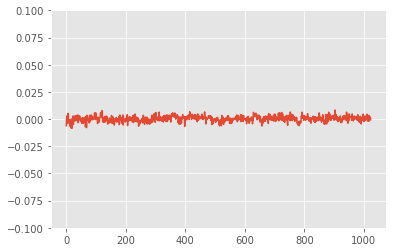

No.212. Prediction:[0.         0.01713172], argmax:1


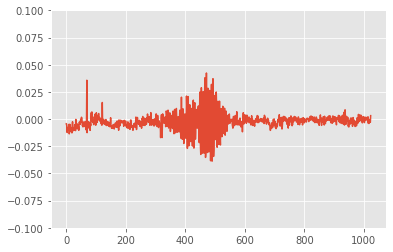

No.213. Prediction:[0.         0.03838125], argmax:1


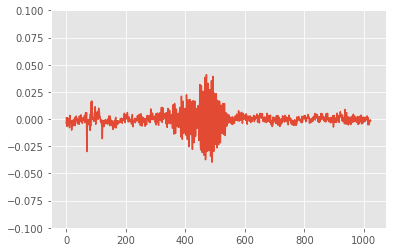

No.214. Prediction:[0. 0.], argmax:0


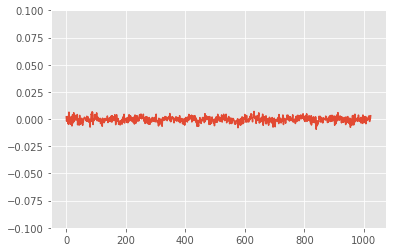

No.215. Prediction:[0.         0.03699723], argmax:1


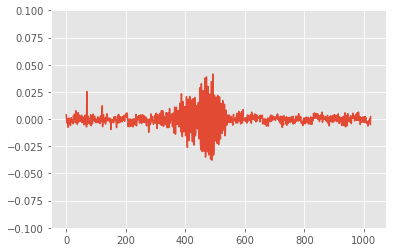

No.216. Prediction:[0. 0.], argmax:0


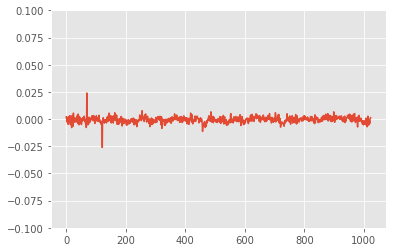

No.217. Prediction:[0.         0.03752209], argmax:1


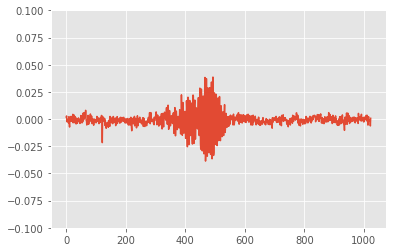

No.218. Prediction:[0. 0.], argmax:0


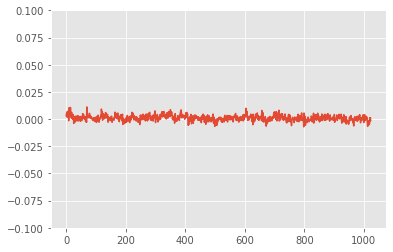

No.219. Prediction:[0. 0.], argmax:0


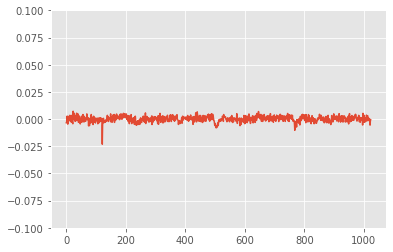

No.220. Prediction:[0.         0.01644683], argmax:1


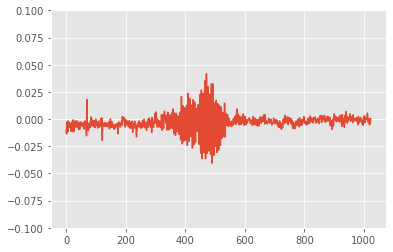

No.221. Prediction:[0. 0.], argmax:0


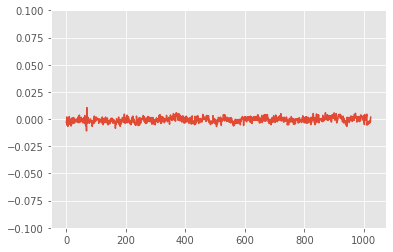

No.222. Prediction:[0.         0.04628147], argmax:1


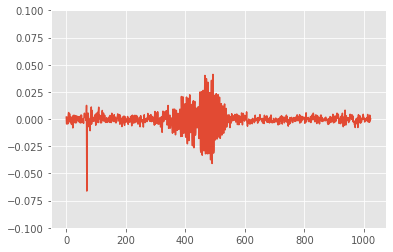

No.223. Prediction:[0. 0.], argmax:0


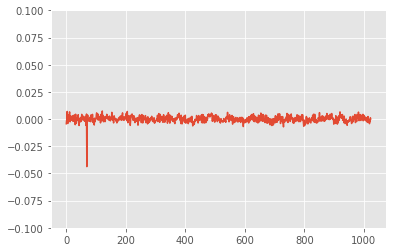

No.224. Prediction:[0.         0.02872392], argmax:1


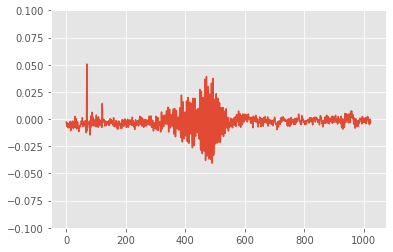

No.225. Prediction:[0. 0.], argmax:0


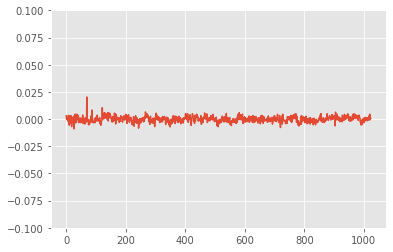

No.226. Prediction:[0. 0.], argmax:0


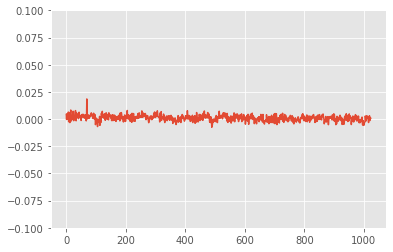

No.227. Prediction:[0.         0.04144791], argmax:1


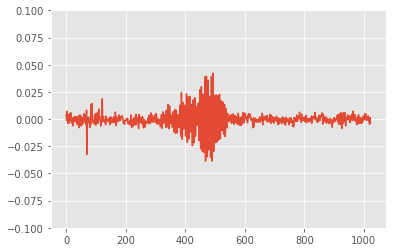

No.228. Prediction:[0. 0.], argmax:0


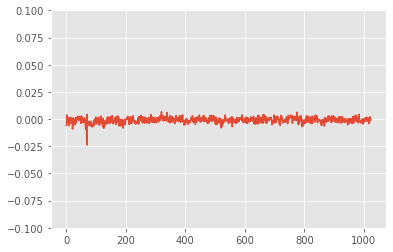

No.229. Prediction:[0. 0.], argmax:0


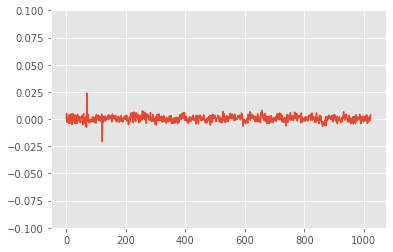

No.230. Prediction:[0. 0.], argmax:0


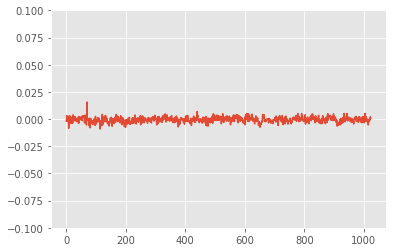

No.231. Prediction:[0. 0.], argmax:0


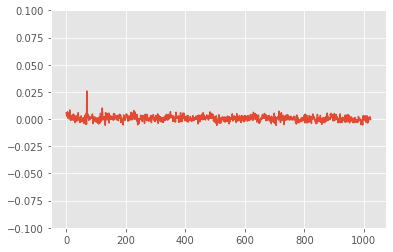

No.232. Prediction:[0.         0.02058149], argmax:1


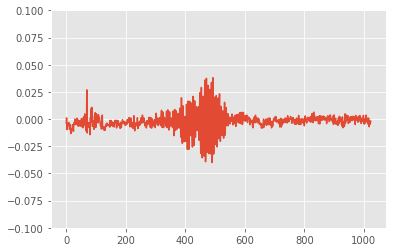

No.233. Prediction:[0. 0.], argmax:0


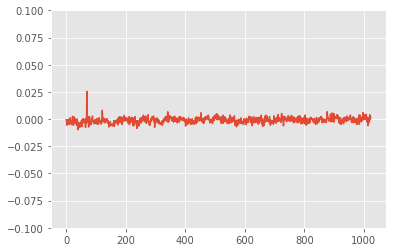

No.234. Prediction:[0. 0.], argmax:0


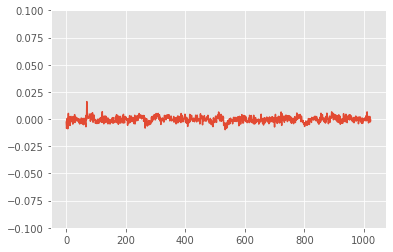

No.235. Prediction:[0. 0.], argmax:0


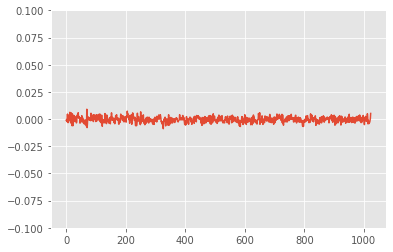

No.236. Prediction:[0. 0.], argmax:0


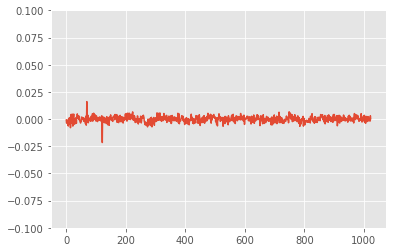

No.237. Prediction:[0. 0.], argmax:0


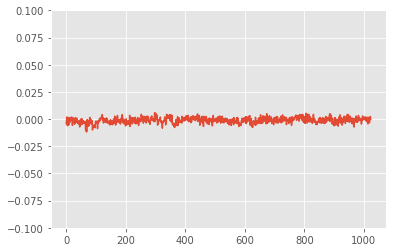

No.238. Prediction:[0. 0.], argmax:0


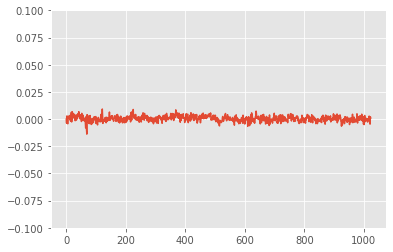

No.239. Prediction:[0.         0.02405385], argmax:1


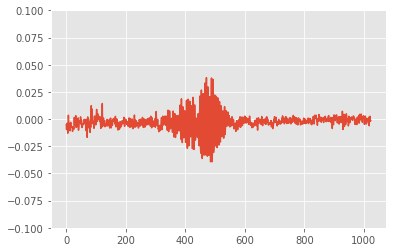

No.240. Prediction:[0. 0.], argmax:0


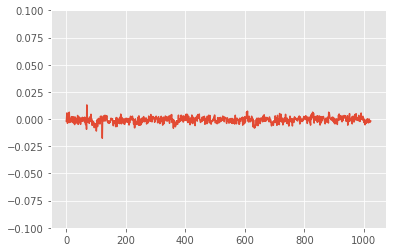

No.241. Prediction:[0.         0.03315403], argmax:1


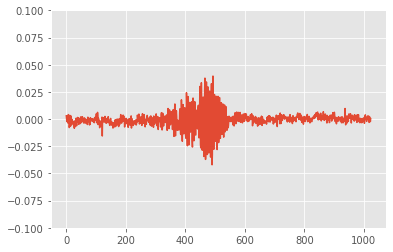

No.242. Prediction:[0. 0.], argmax:0


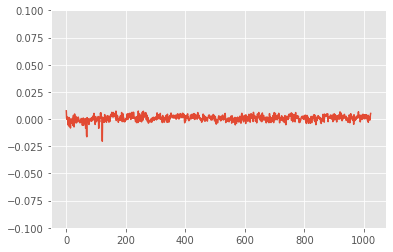

No.243. Prediction:[0. 0.], argmax:0


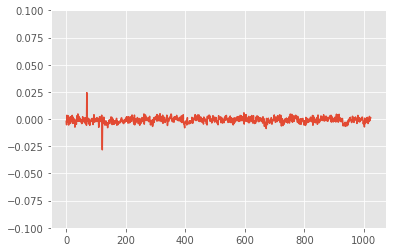

No.244. Prediction:[0.         0.02021427], argmax:1


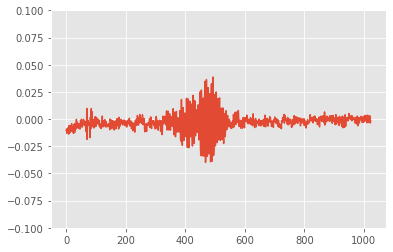

No.245. Prediction:[0. 0.], argmax:0


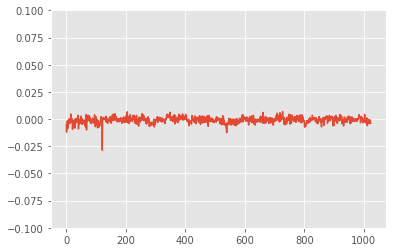

No.246. Prediction:[0.         0.03813596], argmax:1


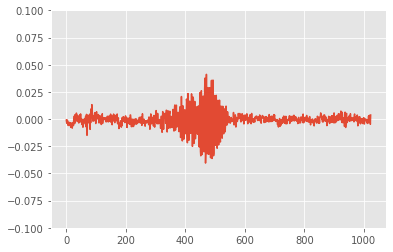

No.247. Prediction:[0.        0.0211533], argmax:1


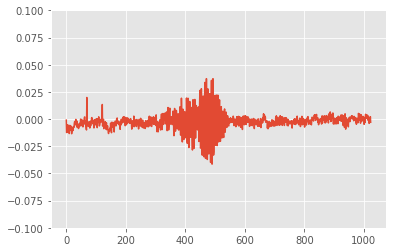

No.248. Prediction:[0.         0.03621596], argmax:1


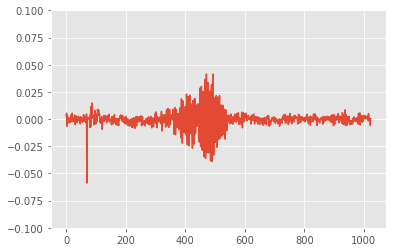

No.249. Prediction:[0. 0.], argmax:0


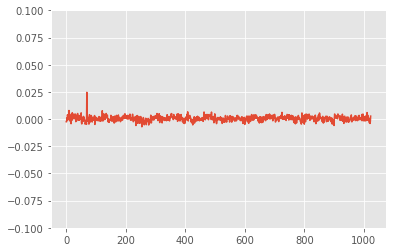

No.250. Prediction:[0.         0.04159931], argmax:1


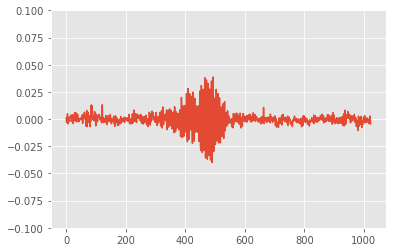

No.251. Prediction:[0. 0.], argmax:0


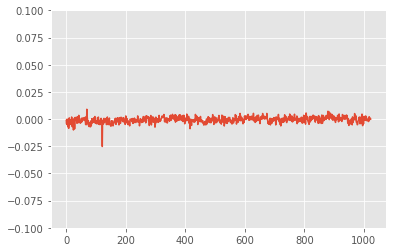

No.252. Prediction:[0.       8.104127], argmax:1


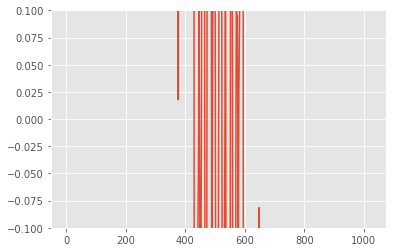

No.253. Prediction:[0.         0.03932976], argmax:1


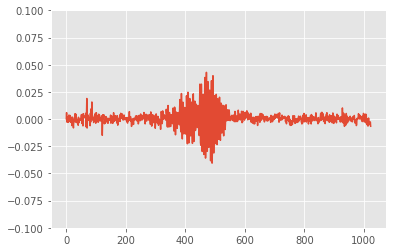

No.254. Prediction:[0. 0.], argmax:0


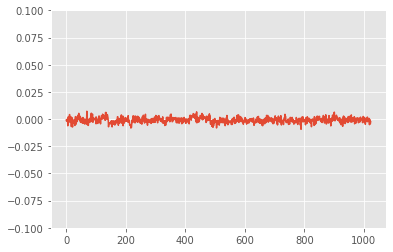

No.255. Prediction:[0. 0.], argmax:0


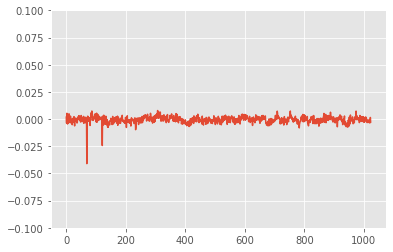

No.256. Prediction:[0.         0.04804791], argmax:1


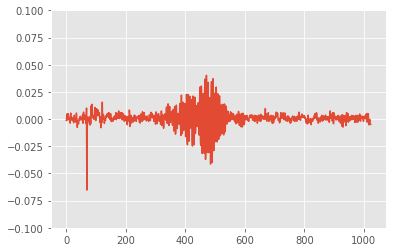

No.257. Prediction:[0.         0.04679778], argmax:1


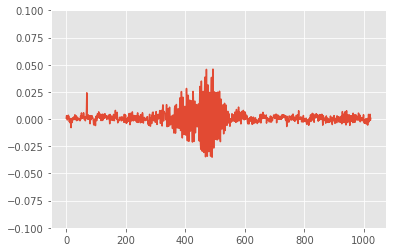

No.258. Prediction:[0.         0.01386904], argmax:1


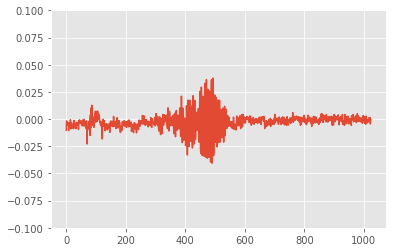

No.259. Prediction:[0. 0.], argmax:0


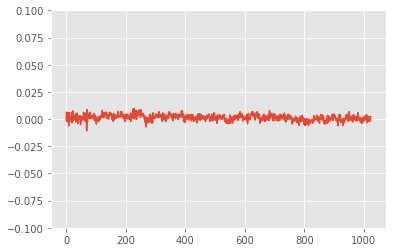

No.260. Prediction:[0. 0.], argmax:0


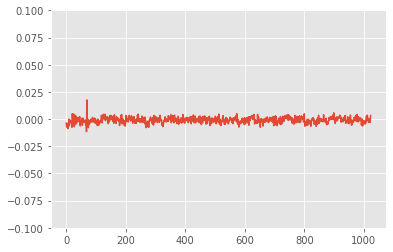

No.261. Prediction:[0. 0.], argmax:0


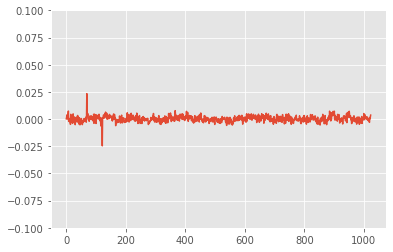

No.262. Prediction:[0. 0.], argmax:0


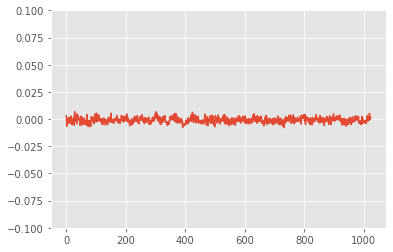

No.263. Prediction:[0.         0.03089207], argmax:1


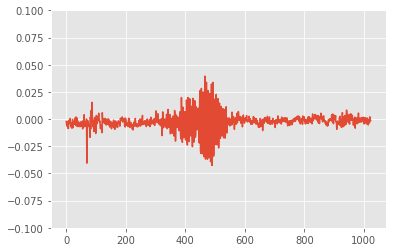

No.264. Prediction:[0.         0.01165248], argmax:1


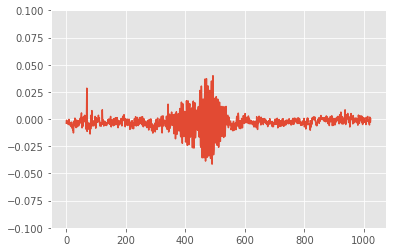

No.265. Prediction:[0. 0.], argmax:0


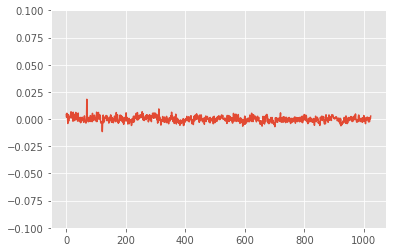

No.266. Prediction:[0.         0.03096801], argmax:1


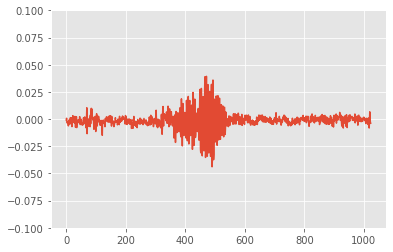

No.267. Prediction:[0. 0.], argmax:0


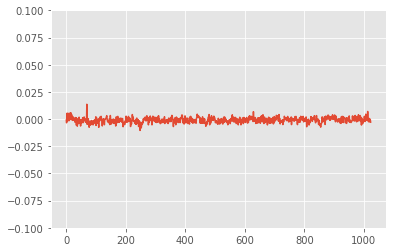

No.268. Prediction:[0. 0.], argmax:0


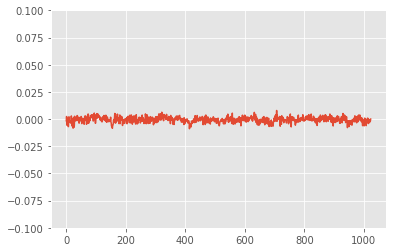

No.269. Prediction:[0.         0.03404275], argmax:1


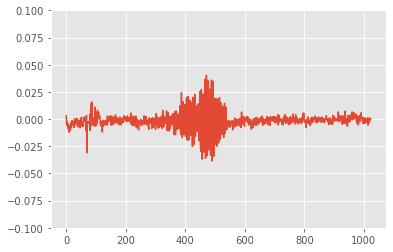

No.270. Prediction:[0. 0.], argmax:0


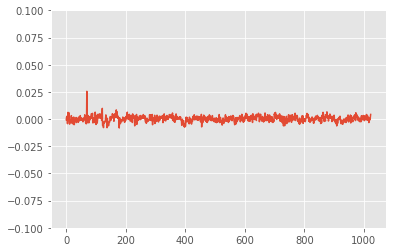

No.271. Prediction:[0. 0.], argmax:0


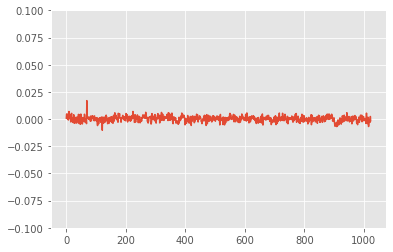

No.272. Prediction:[0.        0.0461541], argmax:1


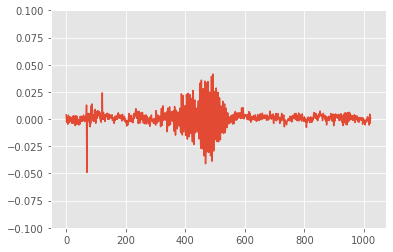

No.273. Prediction:[0.         0.02194552], argmax:1


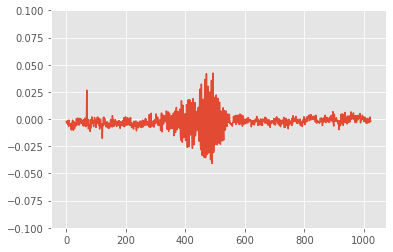

No.274. Prediction:[0. 0.], argmax:0


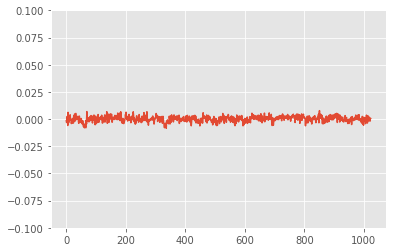

No.275. Prediction:[0.         0.00911421], argmax:1


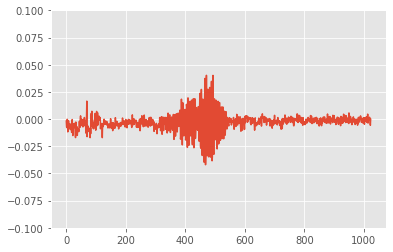

No.276. Prediction:[0. 0.], argmax:0


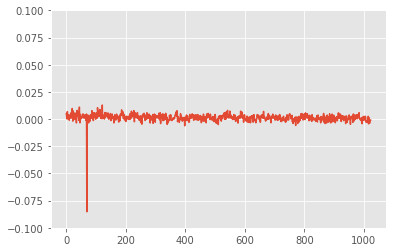

No.277. Prediction:[0.         0.04054476], argmax:1


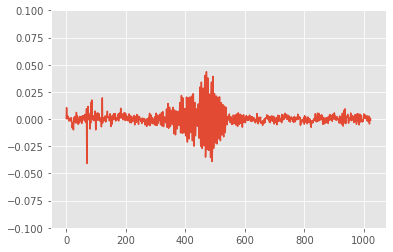

No.278. Prediction:[0. 0.], argmax:0


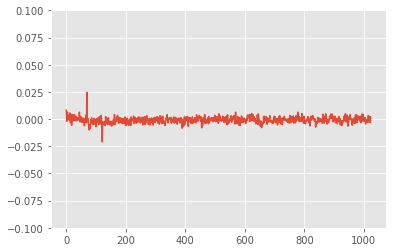

No.279. Prediction:[0. 0.], argmax:0


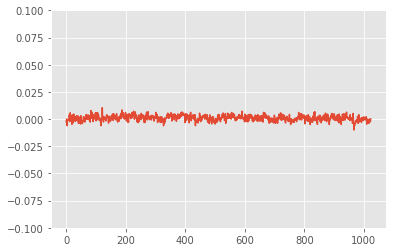

No.280. Prediction:[0. 0.], argmax:0


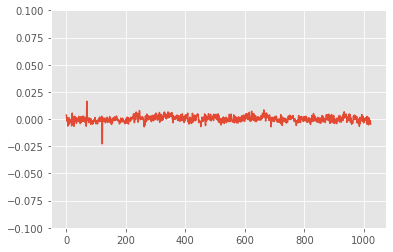

No.281. Prediction:[0. 0.], argmax:0


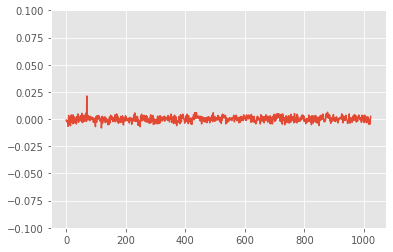

No.282. Prediction:[0. 0.], argmax:0


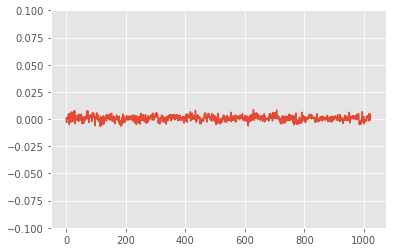

No.283. Prediction:[0. 0.], argmax:0


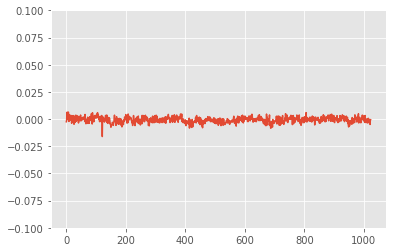

No.284. Prediction:[0. 0.], argmax:0


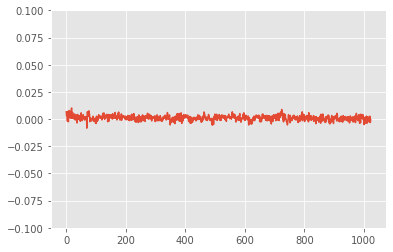

No.285. Prediction:[0. 0.], argmax:0


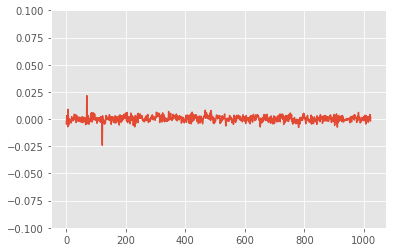

No.286. Prediction:[0. 0.], argmax:0


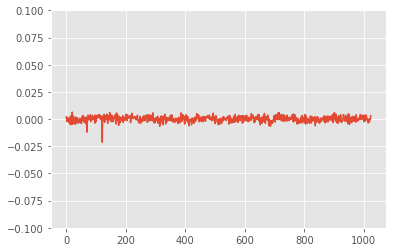

No.287. Prediction:[0. 0.], argmax:0


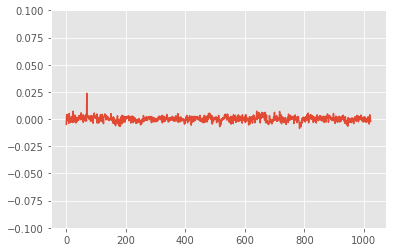

No.288. Prediction:[0. 0.], argmax:0


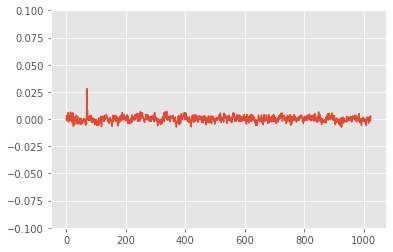

No.289. Prediction:[0.         0.03738502], argmax:1


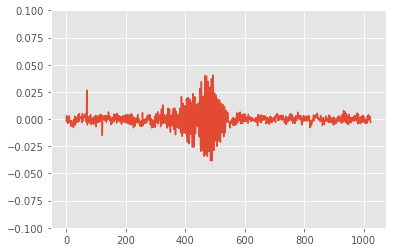

No.290. Prediction:[0.        0.0237579], argmax:1


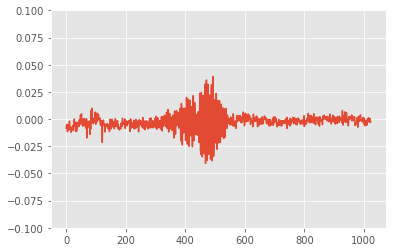

No.291. Prediction:[0.         0.03900909], argmax:1


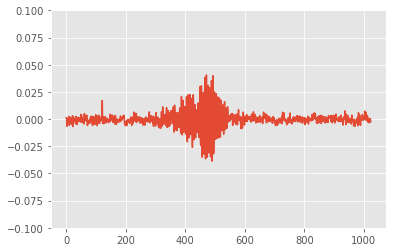

No.292. Prediction:[0.         0.02366565], argmax:1


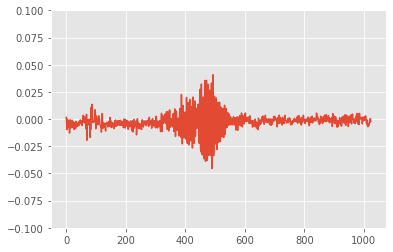

No.293. Prediction:[0.         0.00349028], argmax:1


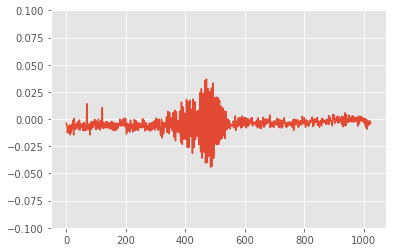

No.294. Prediction:[0. 0.], argmax:0


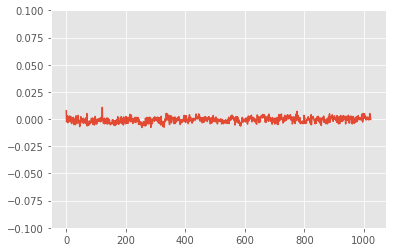

No.295. Prediction:[0.         0.03744972], argmax:1


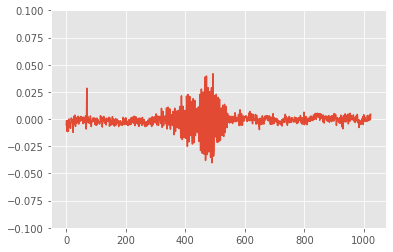

No.296. Prediction:[0. 0.], argmax:0


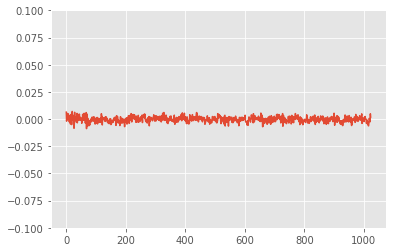

No.297. Prediction:[0. 0.], argmax:0


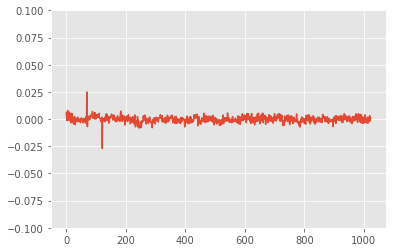

No.298. Prediction:[0. 0.], argmax:0


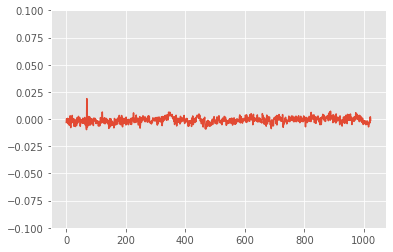

No.299. Prediction:[0.         0.02809063], argmax:1


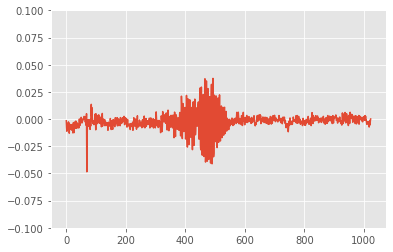

No.300. Prediction:[0. 0.], argmax:0


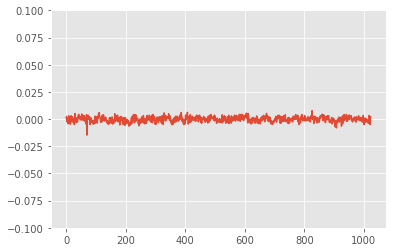

No.301. Prediction:[0. 0.], argmax:0


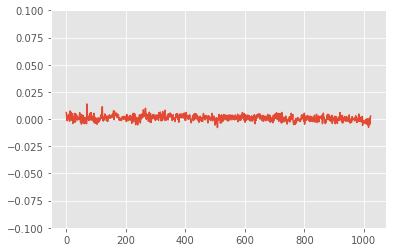

No.302. Prediction:[0.         0.03017599], argmax:1


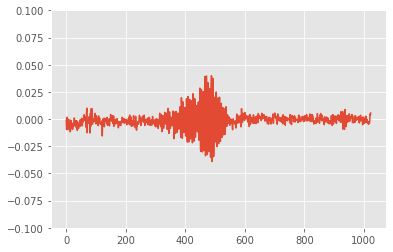

No.303. Prediction:[0. 0.], argmax:0


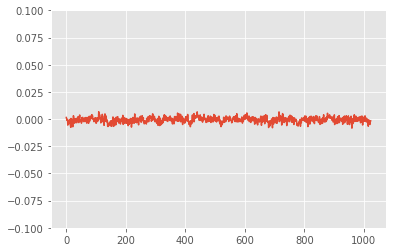

No.304. Prediction:[0.         0.05024288], argmax:1


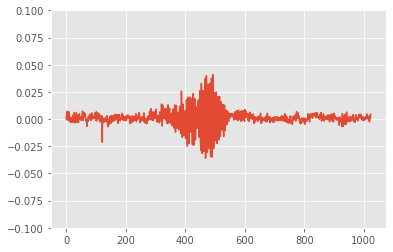

No.305. Prediction:[0. 0.], argmax:0


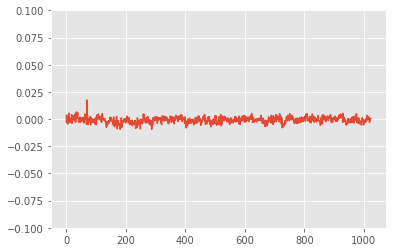

No.306. Prediction:[0.        0.0322495], argmax:1


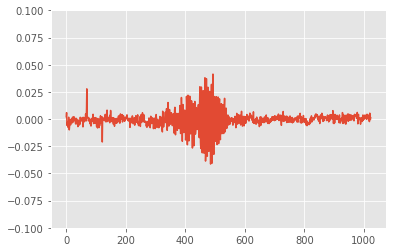

No.307. Prediction:[0.        0.0259194], argmax:1


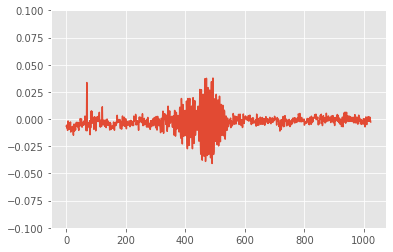

No.308. Prediction:[0.         0.04262394], argmax:1


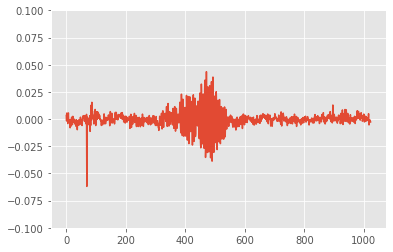

No.309. Prediction:[0. 0.], argmax:0


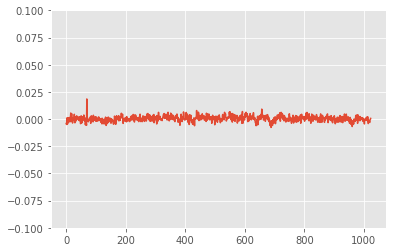

No.310. Prediction:[0. 0.], argmax:0


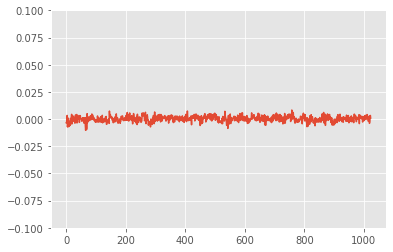

No.311. Prediction:[0.         0.04267701], argmax:1


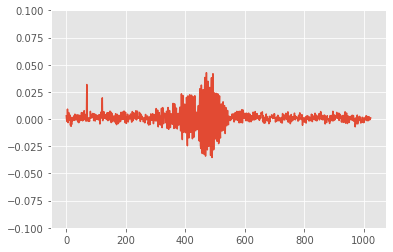

No.312. Prediction:[0. 0.], argmax:0


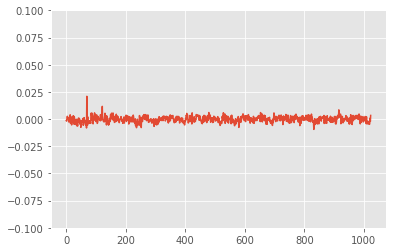

No.313. Prediction:[0.         0.04557049], argmax:1


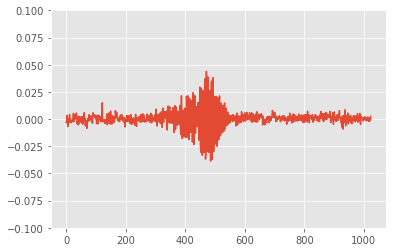

No.314. Prediction:[0. 0.], argmax:0


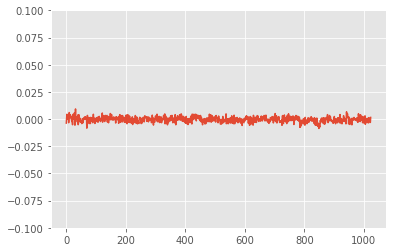

No.315. Prediction:[0. 0.], argmax:0


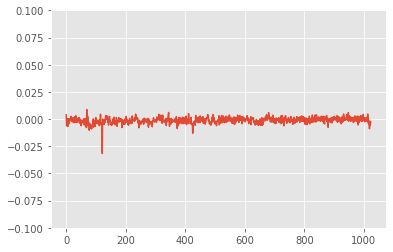

No.316. Prediction:[0.         0.04600796], argmax:1


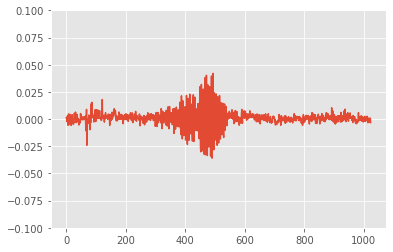

No.317. Prediction:[0.        0.0426756], argmax:1


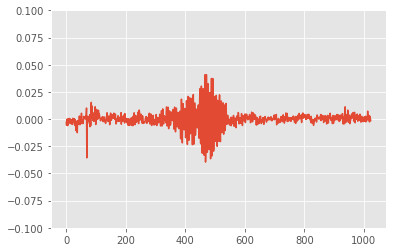

No.318. Prediction:[0.         0.04288581], argmax:1


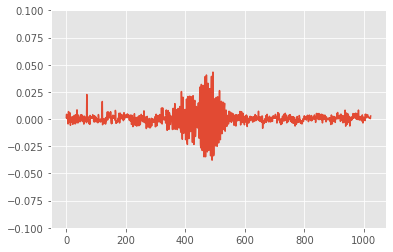

No.319. Prediction:[0.         0.03214537], argmax:1


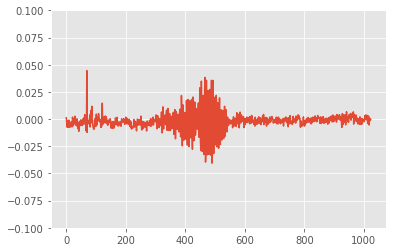

No.320. Prediction:[0. 0.], argmax:0


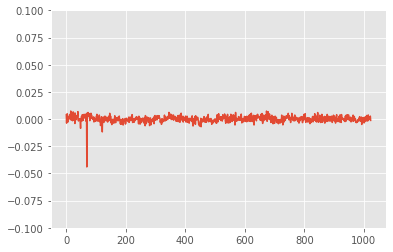

No.321. Prediction:[0.        0.0313132], argmax:1


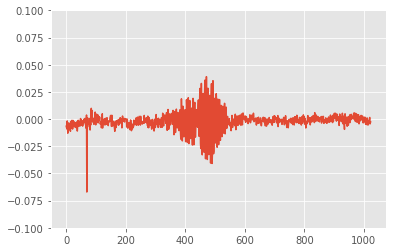

No.322. Prediction:[0.         0.03989844], argmax:1


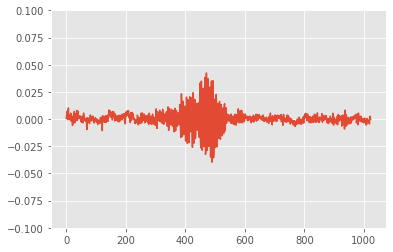

No.323. Prediction:[0. 0.], argmax:0


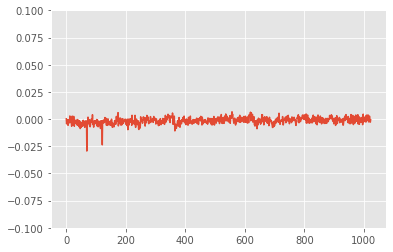

No.324. Prediction:[0.         0.04050918], argmax:1


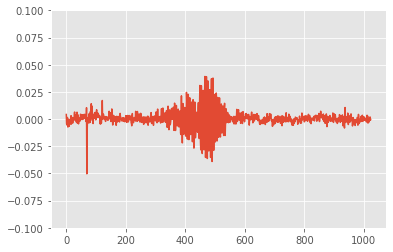

No.325. Prediction:[0.         0.03938485], argmax:1


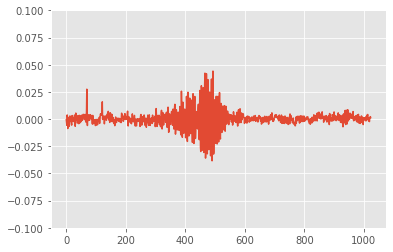

No.326. Prediction:[0.        0.0421256], argmax:1


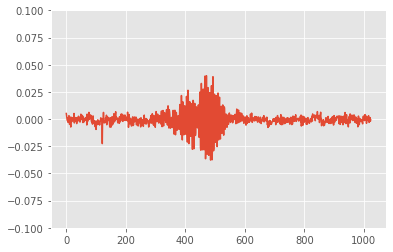

No.327. Prediction:[0. 0.], argmax:0


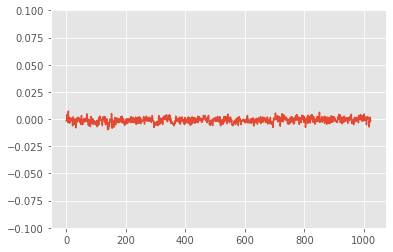

No.328. Prediction:[0.         0.03066583], argmax:1


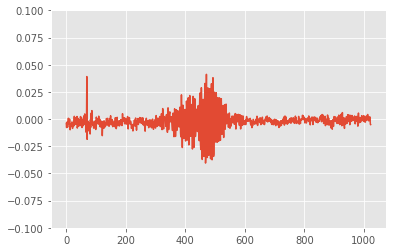

No.329. Prediction:[0.         0.03236833], argmax:1


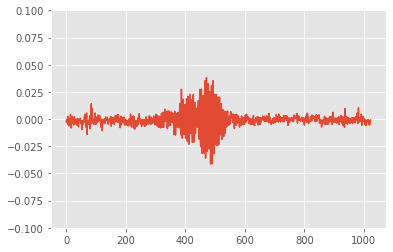

No.330. Prediction:[0. 0.], argmax:0


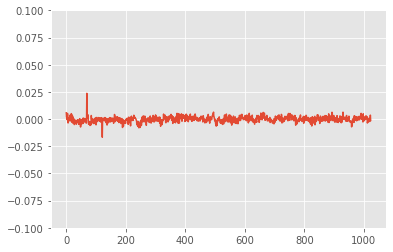

No.331. Prediction:[0.         0.02577611], argmax:1


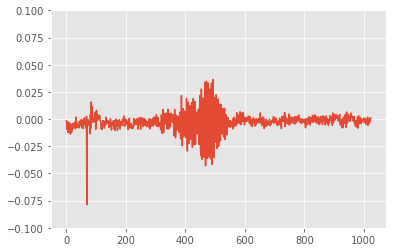

No.332. Prediction:[0.         0.04514211], argmax:1


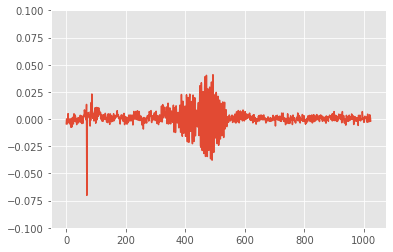

No.333. Prediction:[0.         0.03598296], argmax:1


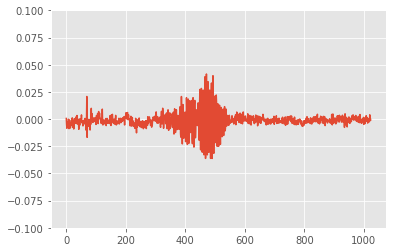

No.334. Prediction:[0.         0.03743909], argmax:1


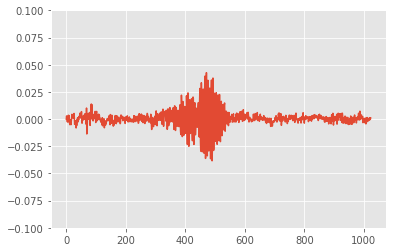

No.335. Prediction:[0.         0.03065399], argmax:1


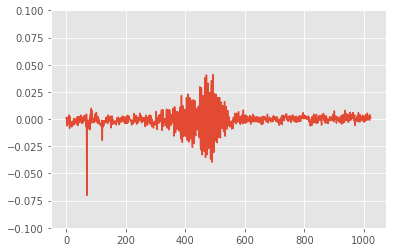

No.336. Prediction:[0.         0.03794875], argmax:1


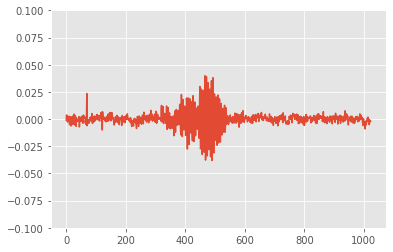

No.337. Prediction:[0. 0.], argmax:0


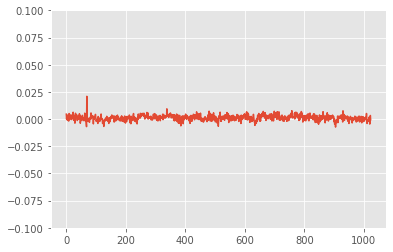

No.338. Prediction:[0. 0.], argmax:0


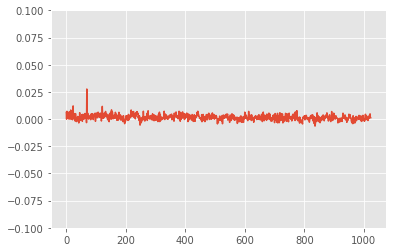

No.339. Prediction:[0.         0.04711528], argmax:1


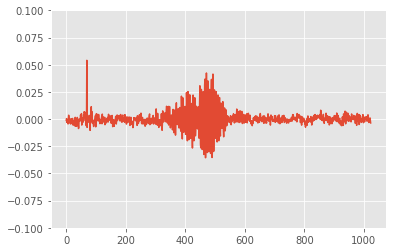

No.340. Prediction:[0.       8.110238], argmax:1


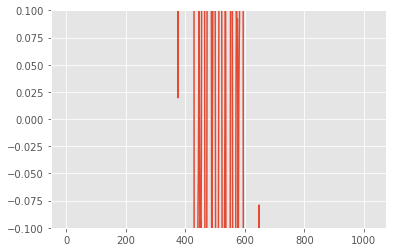

No.341. Prediction:[0.         0.01413374], argmax:1


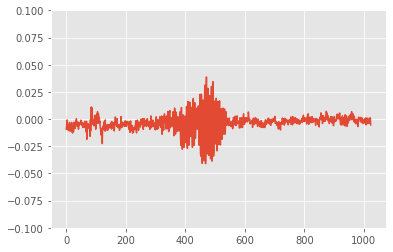

No.342. Prediction:[0.         0.03137935], argmax:1


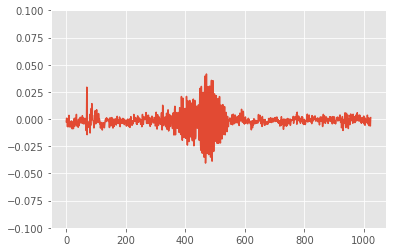

No.343. Prediction:[0.         0.02479244], argmax:1


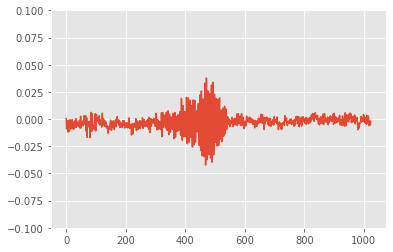

No.344. Prediction:[0.         0.03428094], argmax:1


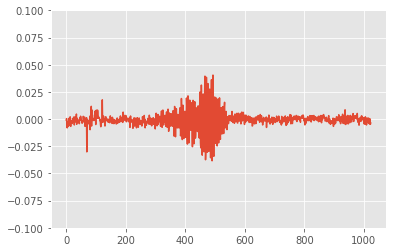

No.345. Prediction:[0. 0.], argmax:0


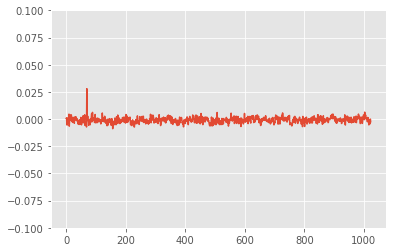

No.346. Prediction:[0.         0.03326261], argmax:1


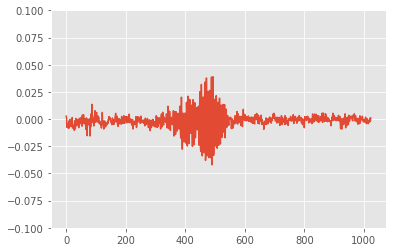

No.347. Prediction:[0. 0.], argmax:0


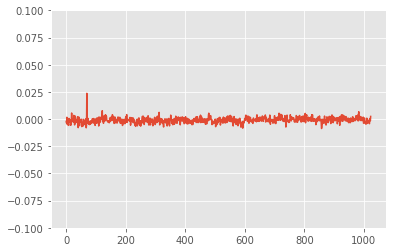

No.348. Prediction:[0.        0.0365848], argmax:1


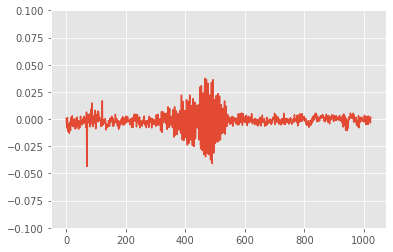

No.349. Prediction:[0. 0.], argmax:0


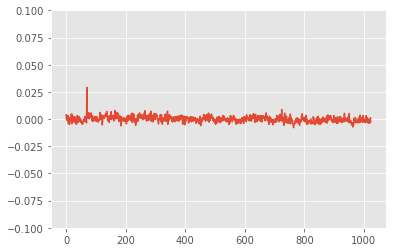

No.350. Prediction:[0.         0.01409751], argmax:1


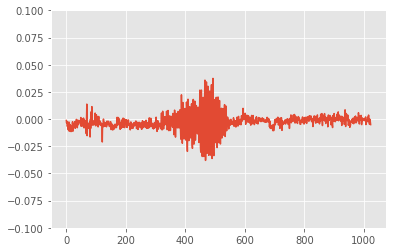

No.351. Prediction:[0.       0.017799], argmax:1


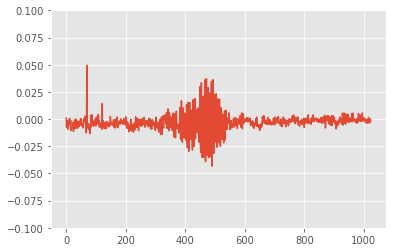

No.352. Prediction:[0. 0.], argmax:0


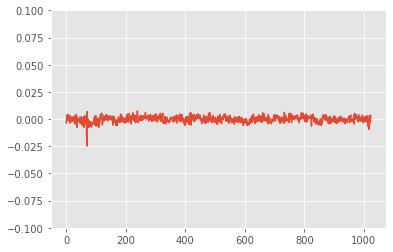

No.353. Prediction:[0.         0.02493542], argmax:1


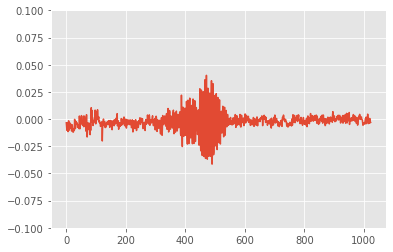

No.354. Prediction:[0.         0.04288065], argmax:1


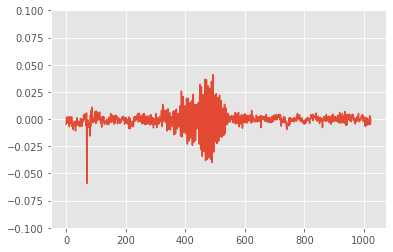

No.355. Prediction:[0.         0.03350351], argmax:1


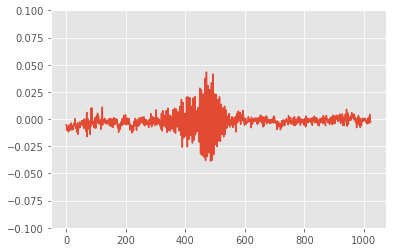

No.356. Prediction:[0.         0.03945486], argmax:1


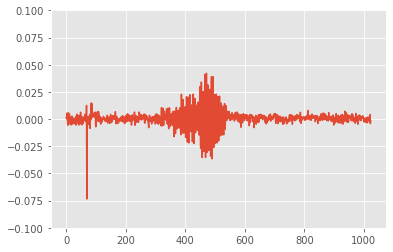

No.357. Prediction:[0.        0.0287187], argmax:1


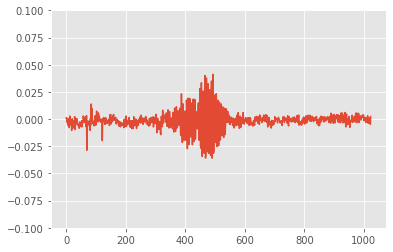

No.358. Prediction:[0.         0.02168025], argmax:1


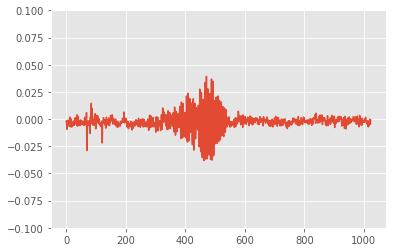

No.359. Prediction:[0.         0.00760283], argmax:1


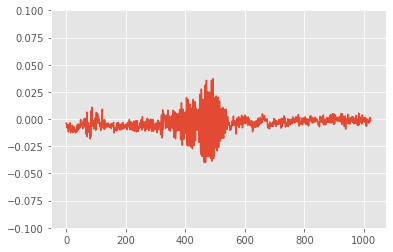

No.360. Prediction:[0. 0.], argmax:0


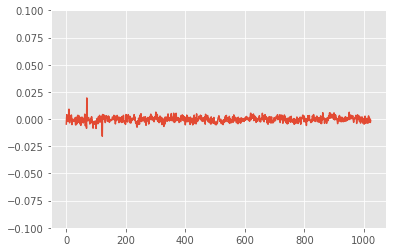

No.361. Prediction:[0.         0.03114633], argmax:1


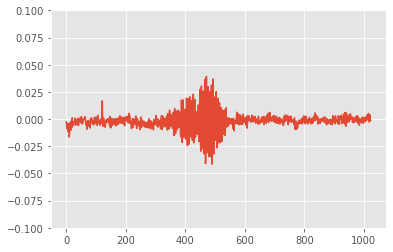

No.362. Prediction:[0.         0.02982845], argmax:1


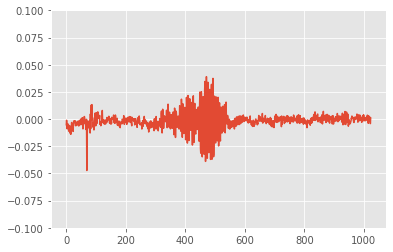

No.363. Prediction:[0. 0.], argmax:0


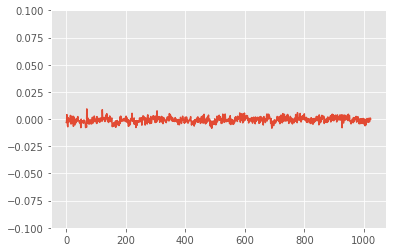

No.364. Prediction:[0.         0.02374128], argmax:1


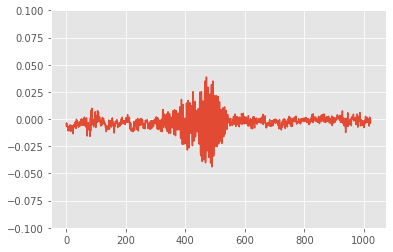

No.365. Prediction:[0. 0.], argmax:0


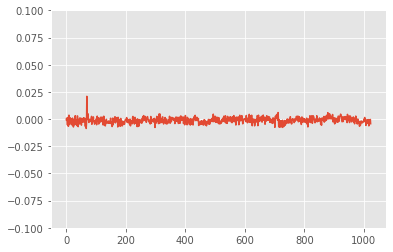

No.366. Prediction:[0. 0.], argmax:0


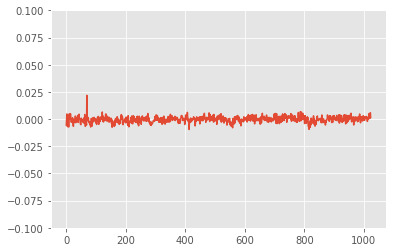

No.367. Prediction:[0.         0.01870272], argmax:1


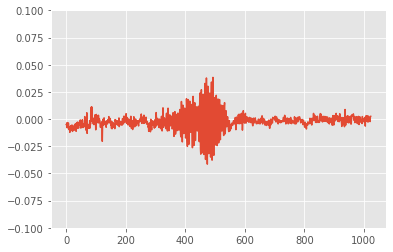

No.368. Prediction:[0. 0.], argmax:0


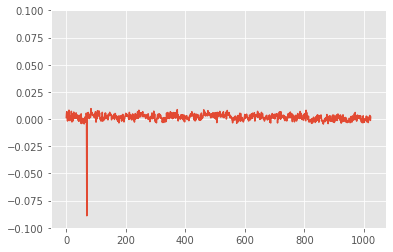

No.369. Prediction:[0.         0.02591506], argmax:1


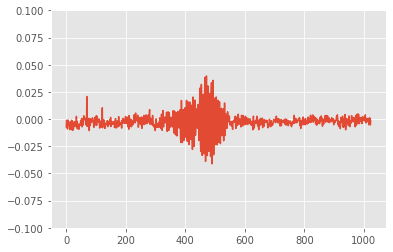

No.370. Prediction:[0.         0.03936166], argmax:1


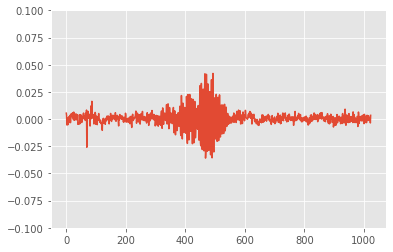

No.371. Prediction:[0. 0.], argmax:0


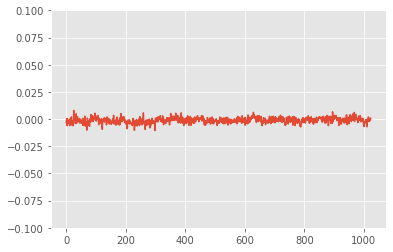

No.372. Prediction:[0. 0.], argmax:0


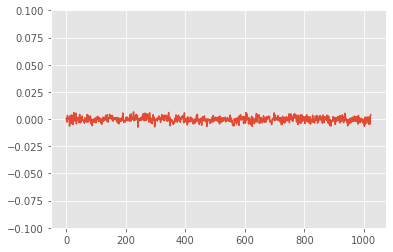

No.373. Prediction:[0.         0.01748941], argmax:1


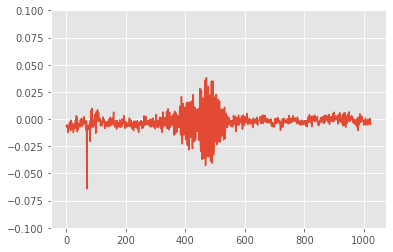

No.374. Prediction:[0.         0.01993217], argmax:1


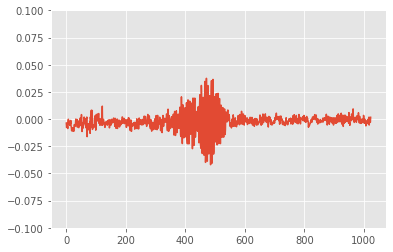

No.375. Prediction:[0. 0.], argmax:0


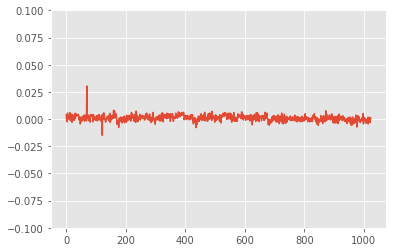

No.376. Prediction:[0.         0.03832496], argmax:1


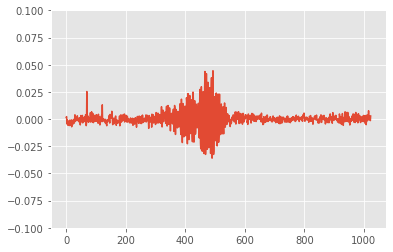

No.377. Prediction:[0. 0.], argmax:0


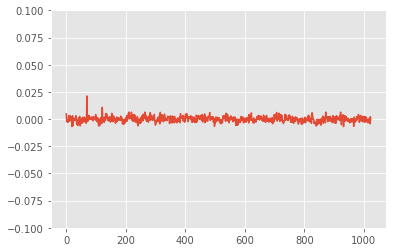

No.378. Prediction:[0. 0.], argmax:0


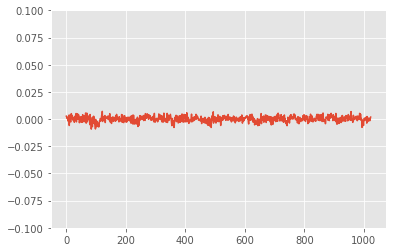

No.379. Prediction:[0.         0.03097142], argmax:1


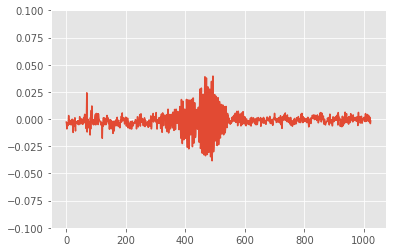

No.380. Prediction:[0.        0.0084296], argmax:1


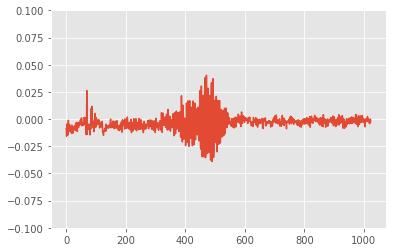

No.381. Prediction:[0. 0.], argmax:0


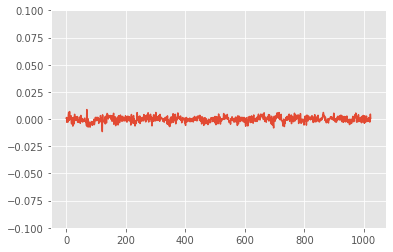

No.382. Prediction:[0.         0.03296768], argmax:1


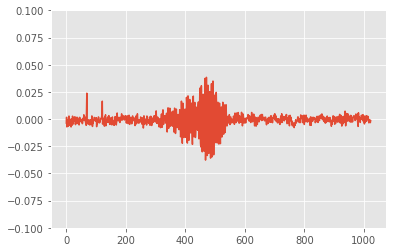

No.383. Prediction:[0.         0.03335999], argmax:1


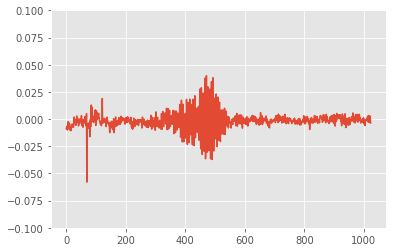

No.384. Prediction:[0. 0.], argmax:0


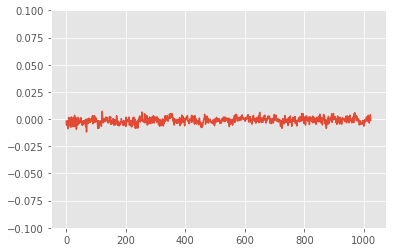

No.385. Prediction:[0.         0.04423924], argmax:1


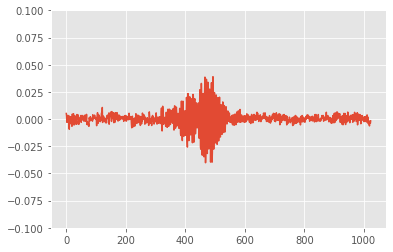

No.386. Prediction:[0.         0.03477006], argmax:1


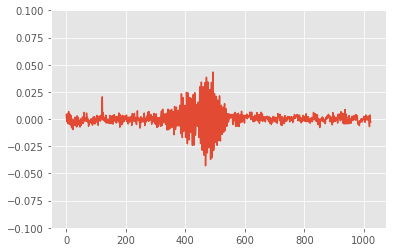

No.387. Prediction:[0.         0.01157193], argmax:1


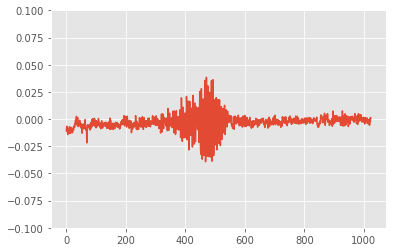

No.388. Prediction:[0.         0.04072652], argmax:1


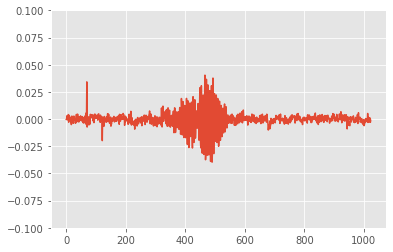

No.389. Prediction:[0. 0.], argmax:0


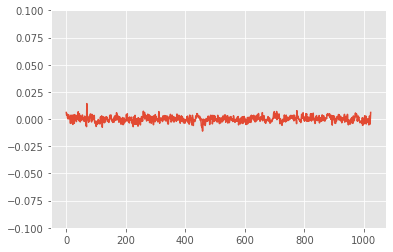

No.390. Prediction:[0. 0.], argmax:0


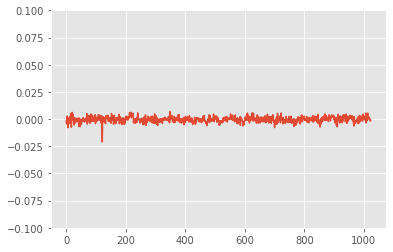

No.391. Prediction:[0. 0.], argmax:0


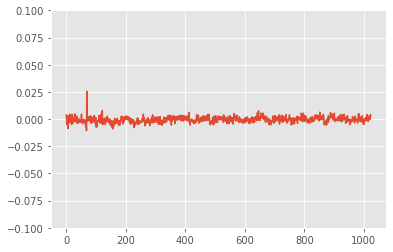

No.392. Prediction:[0. 0.], argmax:0


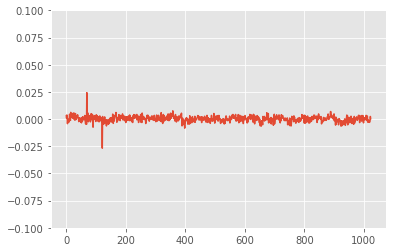

No.393. Prediction:[0.         0.04140061], argmax:1


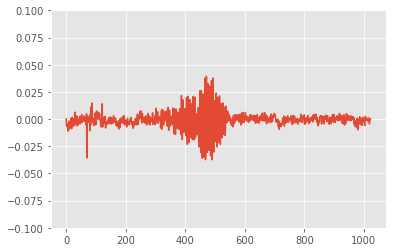

No.394. Prediction:[0. 0.], argmax:0


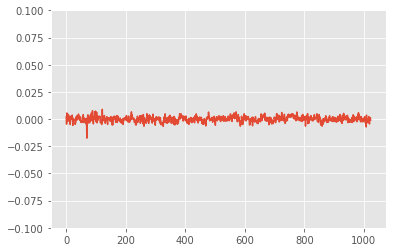

No.395. Prediction:[0.       8.110929], argmax:1


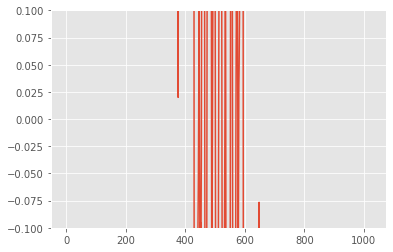

No.396. Prediction:[0. 0.], argmax:0


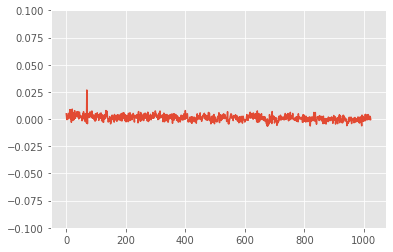

No.397. Prediction:[0.        0.0386642], argmax:1


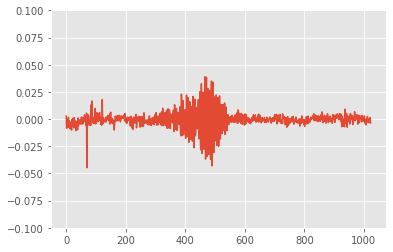

No.398. Prediction:[0.         0.04182046], argmax:1


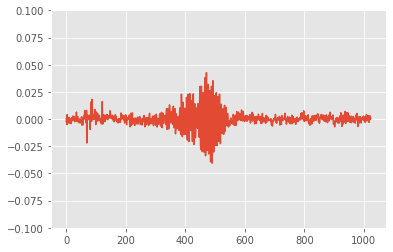

No.399. Prediction:[0.         0.03710444], argmax:1


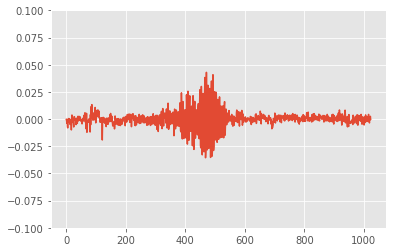

In [28]:
skip = 10
predict(X)

predict different datasets

In [29]:
testDataName = '../data/2019-08-14-16-24-27-R55-none.csv'

# loading datasets
print('Loading test datasets ...')
df = pd.read_csv(testDataName) # loading csv data file
print('Loaded. Start preprocessing ...')
df = df.T 
df = df.drop('Unnamed: 0', axis=0) # removing unnessesary data 
labelCint = df.shape[1]-1 # label column in int
labelColumn = '{}'.format(df.shape[1]-1) # label column in str

df = sklearn.utils.shuffle(df) # no need to shuffle for test
X = df.drop(labelCint, axis=1).values # dropping label column
# X = preprocessing.scale(X) # X is feature set (effects are doutfule)
# extructing feature
if feature == 'all':
    X = X
    inputDim = int(labelCint)
if feature == 'ch1':
    X = X[:,0:int(labelCint/3)] 
    inputDim = int(labelCint/3)
if feature == 'ch2':
    X = X[:,int(labelCint/3):int(labelCint/3)*2]
    inputDim = int(labelCint/3)
if feature == 'ch1tof':
    X = X[:,int((labelCint/3)*2):int((labelCint/3)*2.5)]
    inputDim = int((labelCint/3)/2)
if feature == 'ch2tof':
    X = X[:,int((labelCint/3)*2.5):int((labelCint/3)*3)]
    inputDim = int((labelCint/3)/2)
y = df[labelCint].values # y is label

# # no need to devide dataset for testing
# X_train = X[:-test_size]
# y_train = y[:-test_size]
# X_test = X[-test_size:]
# y_test = y[-test_size:]

# print("Preprocess finished.")
# # plotting training datasets
# print("Plotting training data")
# plt.ion()
# i=0
# while i<=(X.shape[0]-1)/5:
#     xlabel = 'Test data No.{}'.format(i) # 直接xlabelの中で書いたらエラーがでた
#     plt.xlabel(xlabel)
#     plt.ylim(-Yscope,Yscope) # y axis limitation
#     plt.plot(X[i,:]) # plotting data
#     plt.draw() # displaying
#     plt.pause(sleepTime) # interval time
#     plt.clf() # clf は　pauseの後にしないと何も表示されなかった
#     i = i+skip
    
# plt.close() # closing figures
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

Loading test datasets ...
Loaded. Start preprocessing ...
X.shape:  (2000, 1024)
y.shape:  (2000,)


In [14]:
loss, acc = new_model.evaluate(X, y)
print("Model [ {} ], accuracy: {:5.2f}%".format(savename ,100*acc))

2000/2000 [==============================] - 0s 30us/sample - loss: 6.0146 - acc: 0.0240
Model [ models/model-2019-08-14-16-08-06-none-R55.h5 ], accuracy:  2.40%


data.shape: (2000, 1024)
predictions.shape: (2000, 2)
No.0. Prediction:[0.         0.01770481], argmax:1


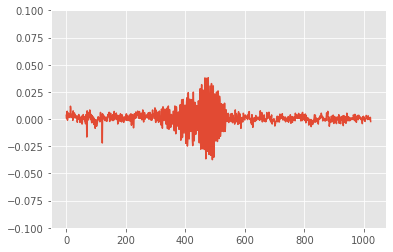

No.10. Prediction:[0. 0.], argmax:0


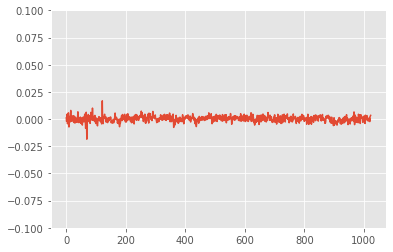

No.20. Prediction:[0. 0.], argmax:0


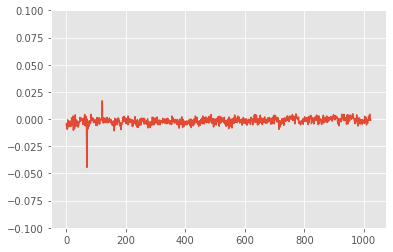

No.30. Prediction:[0.         0.01230192], argmax:1


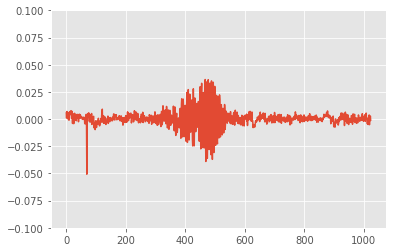

No.40. Prediction:[0.         0.00941791], argmax:1


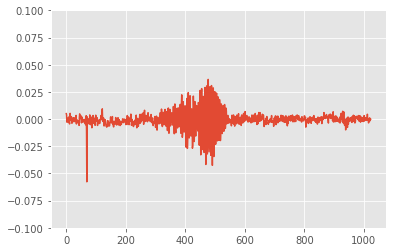

No.50. Prediction:[0.         0.01297609], argmax:1


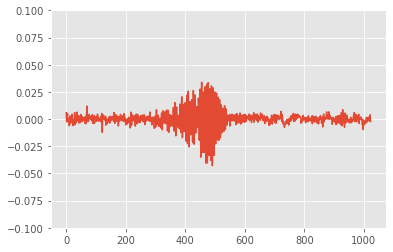

No.60. Prediction:[0.         0.00597775], argmax:1


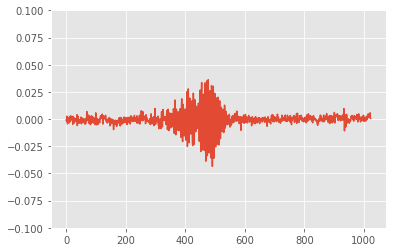

No.70. Prediction:[0.         0.00549372], argmax:1


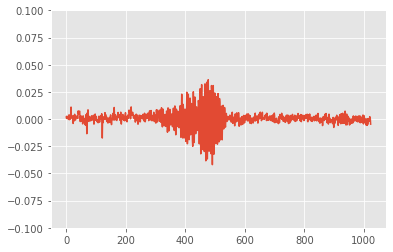

No.80. Prediction:[0. 0.], argmax:0


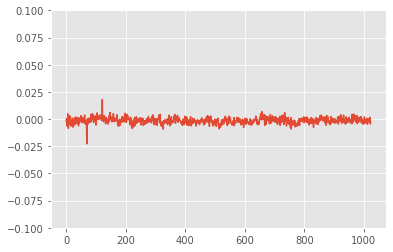

No.90. Prediction:[0. 0.], argmax:0


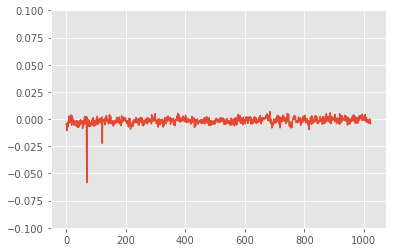

No.100. Prediction:[0.         0.01697483], argmax:1


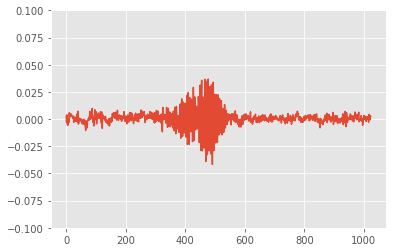

No.110. Prediction:[0.         0.01177788], argmax:1


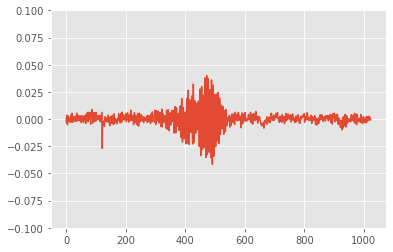

No.120. Prediction:[0. 0.], argmax:0


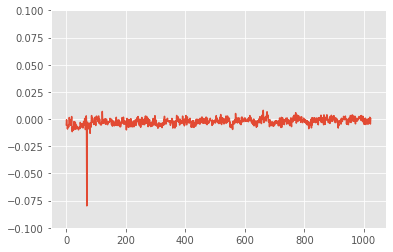

No.130. Prediction:[0.         0.01551929], argmax:1


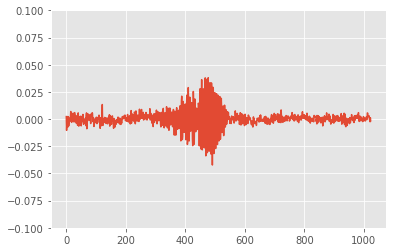

No.140. Prediction:[0. 0.], argmax:0


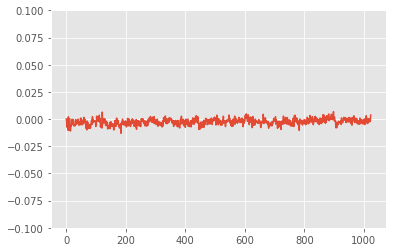

No.150. Prediction:[0.         0.00898763], argmax:1


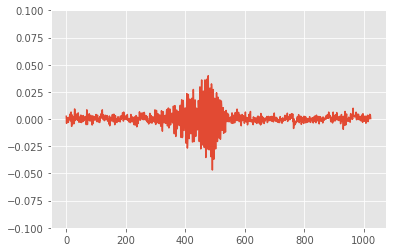

No.160. Prediction:[0.       0.011425], argmax:1


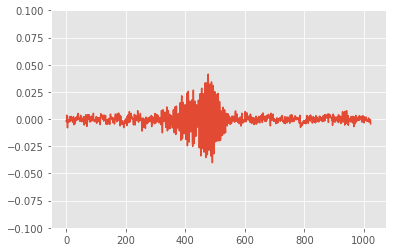

No.170. Prediction:[0.         0.01532874], argmax:1


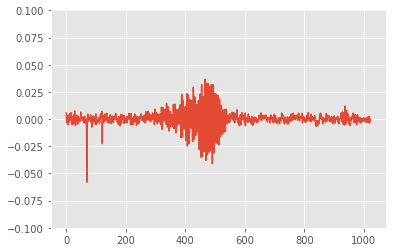

No.180. Prediction:[0. 0.], argmax:0


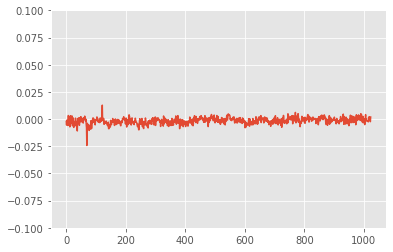

No.190. Prediction:[0.         0.00115371], argmax:1


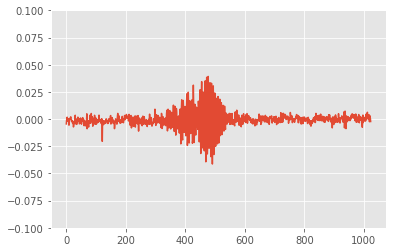

No.200. Prediction:[0. 0.], argmax:0


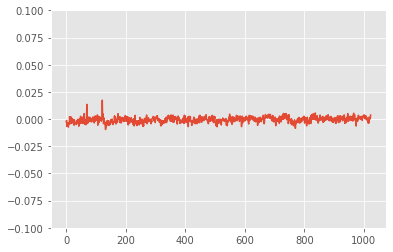

No.210. Prediction:[0.         0.02114799], argmax:1


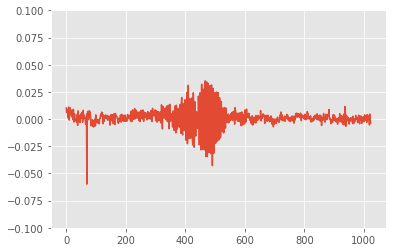

No.220. Prediction:[0. 0.], argmax:0


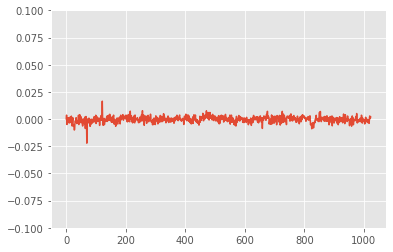

No.230. Prediction:[0. 0.], argmax:0


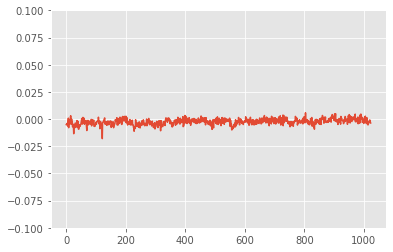

No.240. Prediction:[0.         0.01047008], argmax:1


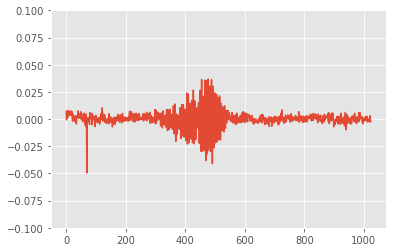

No.250. Prediction:[0. 0.], argmax:0


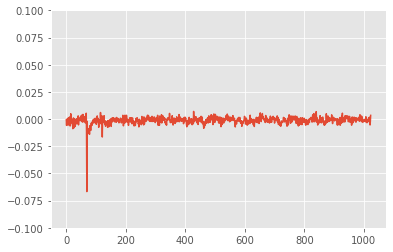

No.260. Prediction:[0. 0.], argmax:0


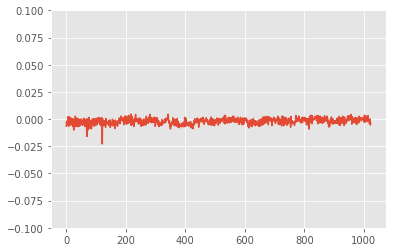

No.270. Prediction:[0. 0.], argmax:0


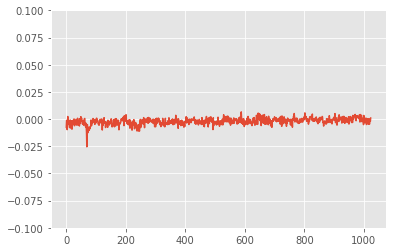

No.280. Prediction:[0. 0.], argmax:0


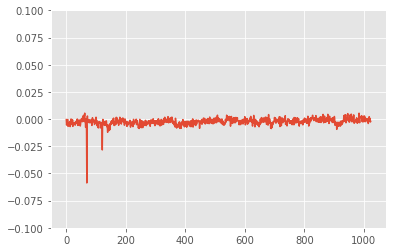

No.290. Prediction:[0.         0.01707423], argmax:1


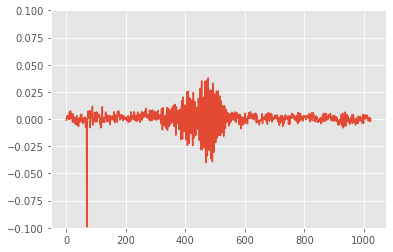

No.300. Prediction:[0.         0.01045054], argmax:1


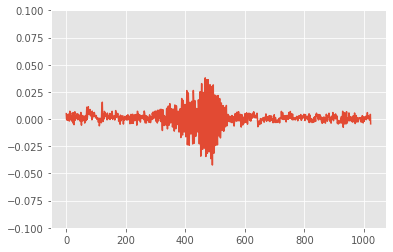

No.310. Prediction:[0. 0.], argmax:0


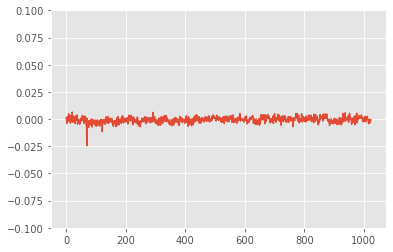

No.320. Prediction:[0.         0.01149052], argmax:1


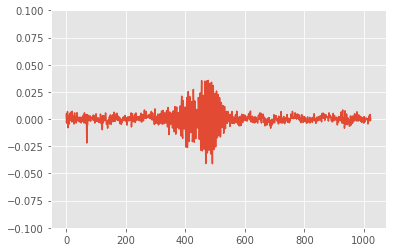

No.330. Prediction:[0.         0.00645683], argmax:1


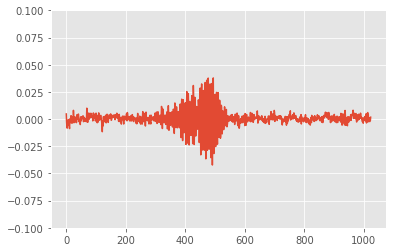

No.340. Prediction:[0.         0.00729757], argmax:1


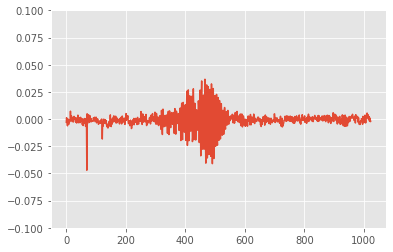

No.350. Prediction:[0. 0.], argmax:0


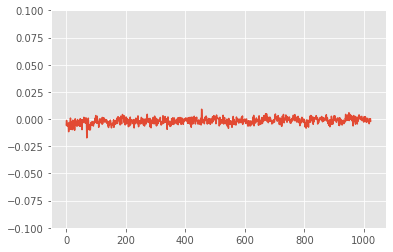

No.360. Prediction:[0. 0.], argmax:0


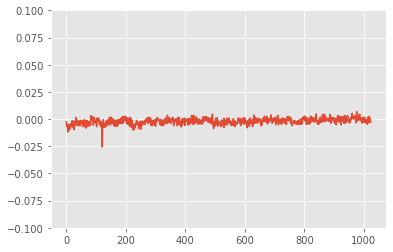

No.370. Prediction:[0. 0.], argmax:0


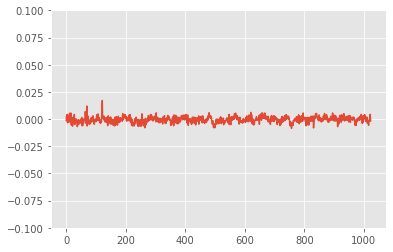

No.380. Prediction:[0. 0.], argmax:0


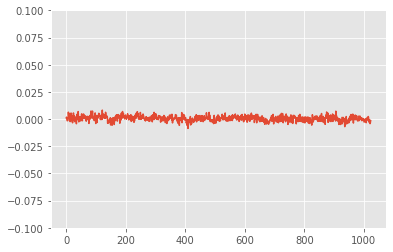

No.390. Prediction:[0.         0.00930012], argmax:1


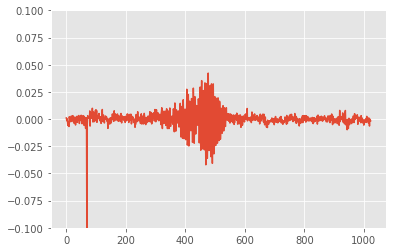

In [15]:
skip = 10
predict(X)

# MEMO

tensorflowで予測するにはリストを渡す必要がある（sendex deep learning how to predict 参考）

一つのデータを予測したい時の、入力データの形は  X (10240, ) O (1, 10240) にしないといけない。

.shapeの形を変えるにはnp.reshapeを使う

np.reshapeの使い方　https://deepage.net/features/numpy-reshape.html

In [16]:
print(X[1,:].shape)
X[1,:]

(1024,)


array([ 0.002882  ,  0.        , -0.00098276, ...,  0.00057638,
        0.00128853,  0.00172937])

(1, 1024)


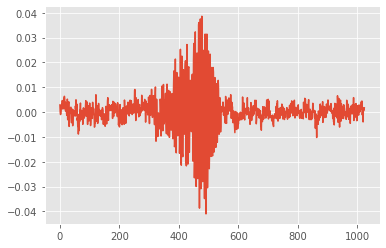

array([[ 0.002882  ,  0.        , -0.00098276, ...,  0.00057638,
         0.00128853,  0.00172937]])

In [17]:
singleData = np.reshape(X[1,:], (1, X[1,:].shape[0]))
print(singleData.shape)
plt.plot(singleData[0])
plt.show()
singleData

data.shape: (1, 1024)
predictions.shape: (1, 2)
No.0. Prediction:[0.         0.00572453], argmax:1


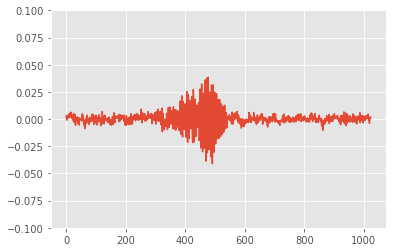

In [18]:
predict(singleData)

In [19]:
singleData

array([[ 0.002882  ,  0.        , -0.00098276, ...,  0.00057638,
         0.00128853,  0.00172937]])

In [20]:
predictions = new_model.predict([singleData])
predictions

array([[0.        , 0.00572453]], dtype=float32)

In [21]:
print("Prediction array:{}, argmax:{}".format(predictions[0,:], np.argmax(predictions[0])))

Prediction array:[0.         0.00572453], argmax:1
